In [3]:
import pandas as pd
import numpy as np
AdmissionData = pd.read_csv('data.csv',sep=',',index_col = False)
del AdmissionData['Serial No.']

In [125]:
AdmissionData.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [5]:
train = AdmissionData.sample(frac = 0.8)
val = AdmissionData.loc[~AdmissionData.index.isin(train.index)]
#train.to_csv('UsedTrainingDataForAdmissionDs.csv',sep=',',index = False)
#val.to_csv('UsedValidationDataForAdmissionDs.csv',sep=',',index = False)
train = pd.read_csv('UsedTrainingDataForAdmissionDs.csv',sep=',',index_col = False)
val = pd.read_csv('UsedValidationDataForAdmissionDs.csv',sep=',',index_col = False)

In [181]:
train = AdmissionData.sample(frac = 1.0)

In [182]:
tempTrain = train.loc[:,train.columns != 'Chance of Admit ']
new_colTrain = [1]*len(train)
tempTrain.insert(loc=0, column='intercept', value=new_colTrain)
trainXmatrix = tempTrain.values
trainXmatrix -= np.mean(trainXmatrix,axis = 0)
trainXmatrix[:,1:] /= np.std(trainXmatrix.astype(float),axis = 0)[1:]
trainXmatrix[:,0] = 1

if(0):
    tempVal = val.loc[:,val.columns != 'Chance of Admit ']
    new_colVal = [1]*len(val)
    tempVal.insert(loc=0, column='intercept', value=new_colVal)
    ValXmatrix = tempVal.values
    ValXmatrix -= np.mean(ValXmatrix,axis = 0)
    ValXmatrix[:,1:] /= np.std(ValXmatrix.astype(float),axis = 0)[1:]
    ValXmatrix[:,0] = 1

In [128]:
len(train)

450

In [129]:
trainYvector = train['Chance of Admit '].values
#valYvector = val['Chance of Admit '].values

In [8]:
numOfSamples,numOfdimPlusOne = trainXmatrix.shape

In [130]:
def getCost(x,y,theta,lamda):
    #x = np.array(x)
    #theta = np.array(theta)
    k = theta@x
    #print(k.shape)
    return (y-k)**2

In [170]:
thetaForEachLamda = {}
#for i in range(0,numOfdimPlusOne):
 #   thetaForEachLamda[i] = []
lamdavalues = []
#alpha = 0.0005
Rigde = True
Lasso = False
trainErrorList = []
valErrorList = []
for lamda in [0, 1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100 ,1000]:# ,1e4]:   
    if lamda >= 100:
        alpha = 1e-6
    else:
        alpha = 0.0005
    print("lamda is "+str(lamda))
    iterations = 0
    lamdavalues.append(lamda)
    theta = np.array([0.5]*numOfdimPlusOne) #initialization
    residual = 999
    cost = 1000
    while residual > 1e-4:
        beforetheta = theta.copy()
        print("iteration is "+str(iterations))
        beforeCost = cost
        iterations += 1
        cost = 0
        for k in range(0,numOfSamples):
            cost += getCost(trainXmatrix[k,:],trainYvector[k],theta,lamda)
        if (Rigde):#L2 regularization
            cost += (lamda*(np.sum(theta*theta))) 
            print("cost is "+str(cost))
            #updating theta by finding the gradient(tempj)
            for j in range(0,numOfdimPlusOne):
                tempj = 0
                for i in range(0,numOfSamples):
                    tempj += (trainXmatrix[i,j]*(trainYvector[i]-(theta@trainXmatrix[i,:])))
                    #tempj += (trainXmatrix[i,j]*np.sqrt(getCost(trainXmatrix[i,:],trainYvector[i],theta,lamda)))
                tempj *= (-2)
                tempj += (2*lamda*theta[j])
                theta[j] -= (alpha*tempj)
            if(0):
                Ypredicted = np.array([0]*len(valYvector))
                valError = 0
                for i in range(0,len(ValXmatrix)):
                    Ypredicted[i] = theta@ValXmatrix[i,:]
                    valError += ((Ypredicted[i]-valYvector[i])**2)
                print('valError is '+str(valError))

        elif (Lasso):#L1 regularization
            cost += (lamda*(np.sum(np.abs(theta))))
            print("cost is "+str(cost))
            #updating theta by finding the gradient(tempj)
            for j in range(0,numOfdimPlusOne):
                tempj = 0
                for i in range(0,numOfSamples):
                    tempj += (trainXmatrix[i,j]*(trainYvector[i]-(theta@trainXmatrix[i,:])))
                    #tempj += (trainXmatrix[i,j]*np.sqrt(getCost(trainXmatrix[i,:],trainYvector[i],theta,lamda)))
                tempj *= (-2)
                if(theta[j]>0):
                    tempj += (lamda)
                elif(theta[j]<0):
                    tempj += (-lamda)
                else:
                    tempj += 0

                theta[j] -= (alpha*tempj)
            if(0):
                Ypredicted = np.array([0]*len(valYvector))
                valError = 0
                for i in range(0,len(ValXmatrix)):
                    Ypredicted[i] = theta@ValXmatrix[i,:]
                    valError += ((Ypredicted[i]-valYvector[i])**2)
                print('valError is '+str(valError))    
            
        residual = np.linalg.norm(cost-beforeCost)
    trainErrorList.append(cost)
    #valErrorList.append(valError)
    #for i in range(0,numOfdimPlusOne):
     #   thetaForEachLamda[i].append(theta[i])
    thetaForEachLamda[lamda] = theta

lamda is 0
iteration is 0
cost is 2725.944908452942
iteration is 1
cost is 77.71185737719061
iteration is 2
cost is 40.72683778524841
iteration is 3
cost is 29.04098393624965
iteration is 4
cost is 20.83881709361199
iteration is 5
cost is 15.44327338959588
iteration is 6
cost is 11.85819214320359
iteration is 7
cost is 9.414145397363285
iteration is 8
cost is 7.699829952608963
iteration is 9
cost is 6.461869819680269
iteration is 10
cost is 5.541844579582768
iteration is 11
cost is 4.839132339690731
iteration is 12
cost is 4.288789584535478
iteration is 13
cost is 3.8481742750893213
iteration is 14
cost is 3.4887479856589976
iteration is 15
cost is 3.1909983426908637
iteration is 16
cost is 2.9412657296521365
iteration is 17
cost is 2.7297432693146644
iteration is 18
cost is 2.5492050737736176
iteration is 19
cost is 2.394189411783622
iteration is 20
cost is 2.260467790783541
iteration is 21
cost is 2.1446949346812803
iteration is 22
cost is 2.044174107396564
iteration is 23
cost is 1.

iteration is 49
cost is 1.3584479525590942
iteration is 50
cost is 1.3557586616110433
iteration is 51
cost is 1.3533856621418916
iteration is 52
cost is 1.3512914594970162
iteration is 53
cost is 1.3494430467551848
iteration is 54
cost is 1.3478113610220093
iteration is 55
cost is 1.346370806672851
iteration is 56
cost is 1.345098837109742
iteration is 57
cost is 1.3439755876965678
iteration is 58
cost is 1.3429835534855497
iteration is 59
cost is 1.3421073061683158
iteration is 60
cost is 1.3413332453950946
iteration is 61
cost is 1.34064938022165
iteration is 62
cost is 1.3400451369785367
iteration is 63
cost is 1.339511190322626
iteration is 64
cost is 1.3390393146358022
iteration is 65
cost is 1.3386222532888374
iteration is 66
cost is 1.3382536035962842
iteration is 67
cost is 1.3379277155570577
iteration is 68
cost is 1.3376396027102335
iteration is 69
cost is 1.3373848636408603
iteration is 70
cost is 1.3371596128501797
iteration is 71
cost is 1.336960419861841
iteration is 72
c

iteration is 30
cost is 1.638086694948615
iteration is 31
cost is 1.6080621425154469
iteration is 32
cost is 1.581702195217593
iteration is 33
cost is 1.558548769722457
iteration is 34
cost is 1.5382032540360555
iteration is 35
cost is 1.5203182956726458
iteration is 36
cost is 1.5045908405029116
iteration is 37
cost is 1.4907562025268228
iteration is 38
cost is 1.4785829909876749
iteration is 39
cost is 1.4678687557631849
iteration is 40
cost is 1.458436238267378
iteration is 41
cost is 1.450130135475575
iteration is 42
cost is 1.4428143007165313
iteration is 43
cost is 1.4363693176554413
iteration is 44
cost is 1.4306903941955071
iteration is 45
cost is 1.4256855314157153
iteration is 46
cost is 1.421273929552069
iteration is 47
cost is 1.417384598728561
iteration is 48
cost is 1.4139551468888651
iteration is 49
cost is 1.410930721351726
iteration is 50
cost is 1.408263083755151
iteration is 51
cost is 1.4059098009786815
iteration is 52
cost is 1.4038335370291817
iteration is 53
cost

iteration is 4
cost is 2844.2029523548354
iteration is 5
cost is 2824.1327938225577
iteration is 6
cost is 2804.206673096869
iteration is 7
cost is 2784.423556125375
iteration is 8
cost is 2764.782416279614
iteration is 9
cost is 2745.2822343017633
iteration is 10
cost is 2725.9219982517116
iteration is 11
cost is 2706.7007034545422
iteration is 12
cost is 2687.617352448346
iteration is 13
cost is 2668.670954932455
iteration is 14
cost is 2649.8605277160186
iteration is 15
cost is 2631.1850946669615
iteration is 16
cost is 2612.6436866613053
iteration is 17
cost is 2594.235341532856
iteration is 18
cost is 2575.959104023236
iteration is 19
cost is 2557.8140257323125
iteration is 20
cost is 2539.799165068941
iteration is 21
cost is 2521.913587202087
iteration is 22
cost is 2504.156364012286
iteration is 23
cost is 2486.526574043467
iteration is 24
cost is 2469.023302455099
iteration is 25
cost is 2451.645640974711
iteration is 26
cost is 2434.3926878507214
iteration is 27
cost is 2417.2

iteration is 220
cost is 637.5413259326491
iteration is 221
cost is 633.3032916119872
iteration is 222
cost is 629.095641590645
iteration is 223
cost is 624.9181577792568
iteration is 224
cost is 620.7706236541704
iteration is 225
cost is 616.6528242462003
iteration is 226
cost is 612.5645461294712
iteration is 227
cost is 608.5055774103357
iteration is 228
cost is 604.4757077163741
iteration is 229
cost is 600.4747281854741
iteration is 230
cost is 596.5024314549853
iteration is 231
cost is 592.5586116509568
iteration is 232
cost is 588.643064377447
iteration is 233
cost is 584.7555867059101
iteration is 234
cost is 580.8959771646664
iteration is 235
cost is 577.0640357284383
iteration is 236
cost is 573.2595638079688
iteration is 237
cost is 569.4823642397076
iteration is 238
cost is 565.7322412755816
iteration is 239
cost is 562.0090005728243
iteration is 240
cost is 558.3124491838942
iteration is 241
cost is 554.6423955464537
iteration is 242
cost is 550.9986494734237
iteration is 

iteration is 434
cost is 172.98365851947563
iteration is 435
cost is 172.07293348379108
iteration is 436
cost is 171.16871466035442
iteration is 437
cost is 170.27095537989766
iteration is 438
cost is 169.37960930816067
iteration is 439
cost is 168.49463044348636
iteration is 440
cost is 167.61597311443256
iteration is 441
cost is 166.74359197740137
iteration is 442
cost is 165.87744201428546
iteration is 443
cost is 165.01747853013146
iteration is 444
cost is 164.16365715081974
iteration is 445
cost is 163.31593382076085
iteration is 446
cost is 162.47426480060935
iteration is 447
cost is 161.6386066649924
iteration is 448
cost is 160.80891630025664
iteration is 449
cost is 159.9851509022298
iteration is 450
cost is 159.16726797399866
iteration is 451
cost is 158.35522532370342
iteration is 452
cost is 157.54898106234725
iteration is 453
cost is 156.7484936016229
iteration is 454
cost is 155.95372165175286
iteration is 455
cost is 155.16462421934628
iteration is 456
cost is 154.381160

iteration is 637
cost is 75.1197426372222
iteration is 638
cost is 74.90585947139911
iteration is 639
cost is 74.69348705487798
iteration is 640
cost is 74.48261457351018
iteration is 641
cost is 74.2732312907446
iteration is 642
cost is 74.06532654707071
iteration is 643
cost is 73.85888975946523
iteration is 644
cost is 73.65391042084337
iteration is 645
cost is 73.45037809951336
iteration is 646
cost is 73.24828243863537
iteration is 647
cost is 73.04761315568429
iteration is 648
cost is 72.84836004191607
iteration is 649
cost is 72.65051296183793
iteration is 650
cost is 72.454061852683
iteration is 651
cost is 72.2589967238876
iteration is 652
cost is 72.06530765657347
iteration is 653
cost is 71.87298480303274
iteration is 654
cost is 71.68201838621727
iteration is 655
cost is 71.49239869923139
iteration is 656
cost is 71.30411610482807
iteration is 657
cost is 71.1171610349092
iteration is 658
cost is 70.93152399002909
iteration is 659
cost is 70.74719553890151
iteration is 660


cost is 50.34932421563664
iteration is 875
cost is 50.308212529944385
iteration is 876
cost is 50.26737774835493
iteration is 877
cost is 50.22681790639401
iteration is 878
cost is 50.18653105365995
iteration is 879
cost is 50.1465152537227
iteration is 880
cost is 50.1067685840236
iteration is 881
cost is 50.06728913577572
iteration is 882
cost is 50.02807501386526
iteration is 883
cost is 49.98912433675316
iteration is 884
cost is 49.950435236377814
iteration is 885
cost is 49.91200585805835
iteration is 886
cost is 49.87383436039862
iteration is 887
cost is 49.835918915191755
iteration is 888
cost is 49.79825770732567
iteration is 889
cost is 49.76084893468894
iteration is 890
cost is 49.723690808077684
iteration is 891
cost is 49.68678155110269
iteration is 892
cost is 49.650119400097736
iteration is 893
cost is 49.61370260402797
iteration is 894
cost is 49.577529424399586
iteration is 895
cost is 49.54159813516967
iteration is 896
cost is 49.50590702265673
iteration is 897
cost is

cost is 45.42791268866369
iteration is 1107
cost is 45.41847018286763
iteration is 1108
cost is 45.40908191875039
iteration is 1109
cost is 45.39974752419631
iteration is 1110
cost is 45.390466629738384
iteration is 1111
cost is 45.3812388685394
iteration is 1112
cost is 45.37206387637294
iteration is 1113
cost is 45.36294129160474
iteration is 1114
cost is 45.353870755174185
iteration is 1115
cost is 45.3448519105757
iteration is 1116
cost is 45.33588440384051
iteration is 1117
cost is 45.32696788351854
iteration is 1118
cost is 45.31810200066023
iteration is 1119
cost is 45.309286408798705
iteration is 1120
cost is 45.30052076393194
iteration is 1121
cost is 45.29180472450511
iteration is 1122
cost is 45.28313795139305
iteration is 1123
cost is 45.274520107882786
iteration is 1124
cost is 45.26595085965639
iteration is 1125
cost is 45.257429874773635
iteration is 1126
cost is 45.24895682365512
iteration is 1127
cost is 45.24053137906517
iteration is 1128
cost is 45.23215321609527
ite

iteration is 1319
cost is 44.2185933922185
iteration is 1320
cost is 44.21530382815663
iteration is 1321
cost is 44.21202754706182
iteration is 1322
cost is 44.208764466640815
iteration is 1323
cost is 44.20551450517402
iteration is 1324
cost is 44.202277581511396
iteration is 1325
cost is 44.19905361506841
iteration is 1326
cost is 44.19584252582199
iteration is 1327
cost is 44.19264423430655
iteration is 1328
cost is 44.18945866160995
iteration is 1329
cost is 44.18628572936959
iteration is 1330
cost is 44.18312535976848
iteration is 1331
cost is 44.17997747553131
iteration is 1332
cost is 44.176841999920676
iteration is 1333
cost is 44.1737188567331
iteration is 1334
cost is 44.17060797029537
iteration is 1335
cost is 44.167509265460666
iteration is 1336
cost is 44.16442266760479
iteration is 1337
cost is 44.16134810262249
iteration is 1338
cost is 44.15828549692377
iteration is 1339
cost is 44.15523477743014
iteration is 1340
cost is 44.152195871570996
iteration is 1341
cost is 44.

iteration is 1565
cost is 43.67063222876687
iteration is 1566
cost is 43.669089572939846
iteration is 1567
cost is 43.66755040914071
iteration is 1568
cost is 43.66601472177635
iteration is 1569
cost is 43.66448249535342
iteration is 1570
cost is 43.66295371447741
iteration is 1571
cost is 43.6614283638521
iteration is 1572
cost is 43.65990642827882
iteration is 1573
cost is 43.65838789265579
iteration is 1574
cost is 43.65687274197739
iteration is 1575
cost is 43.65536096133357
iteration is 1576
cost is 43.65385253590906
iteration is 1577
cost is 43.65234745098285
iteration is 1578
cost is 43.650845691927415
iteration is 1579
cost is 43.649347244208116
iteration is 1580
cost is 43.647852093382525
iteration is 1581
cost is 43.64636022509981
iteration is 1582
cost is 43.64487162510004
iteration is 1583
cost is 43.643386279213594
iteration is 1584
cost is 43.641904173360544
iteration is 1585
cost is 43.64042529354997
iteration is 1586
cost is 43.63894962587938
iteration is 1587
cost is 4

iteration is 1756
cost is 43.42573260480877
iteration is 1757
cost is 43.42465851243807
iteration is 1758
cost is 43.423586152697176
iteration is 1759
cost is 43.42251552054891
iteration is 1760
cost is 43.421446610982784
iteration is 1761
cost is 43.42037941901474
iteration is 1762
cost is 43.41931393968697
iteration is 1763
cost is 43.418250168067814
iteration is 1764
cost is 43.41718809925153
iteration is 1765
cost is 43.41612772835809
iteration is 1766
cost is 43.41506905053309
iteration is 1767
cost is 43.414012060947506
iteration is 1768
cost is 43.41295675479759
iteration is 1769
cost is 43.41190312730461
iteration is 1770
cost is 43.41085117371478
iteration is 1771
cost is 43.409800889299056
iteration is 1772
cost is 43.40875226935294
iteration is 1773
cost is 43.40770530919634
iteration is 1774
cost is 43.40666000417346
iteration is 1775
cost is 43.405616349652526
iteration is 1776
cost is 43.40457434102572
iteration is 1777
cost is 43.403533973708974
iteration is 1778
cost is

iteration is 1992
cost is 43.21193876712578
iteration is 1993
cost is 43.2111747609992
iteration is 1994
cost is 43.21041176930053
iteration is 1995
cost is 43.20964979021724
iteration is 1996
cost is 43.20888882194277
iteration is 1997
cost is 43.20812886267653
iteration is 1998
cost is 43.207369910623996
iteration is 1999
cost is 43.20661196399652
iteration is 2000
cost is 43.205855021011395
iteration is 2001
cost is 43.20509907989181
iteration is 2002
cost is 43.204344138866745
iteration is 2003
cost is 43.203590196171014
iteration is 2004
cost is 43.20283725004528
iteration is 2005
cost is 43.202085298735824
iteration is 2006
cost is 43.20133434049474
iteration is 2007
cost is 43.200584373579765
iteration is 2008
cost is 43.199835396254315
iteration is 2009
cost is 43.1990874067874
iteration is 2010
cost is 43.19834040345361
iteration is 2011
cost is 43.19759438453312
iteration is 2012
cost is 43.196849348311616
iteration is 2013
cost is 43.19610529308027
iteration is 2014
cost is 

iteration is 2227
cost is 43.0570127212724
iteration is 2228
cost is 43.056446983543765
iteration is 2229
cost is 43.05588194895901
iteration is 2230
cost is 43.05531761653126
iteration is 2231
cost is 43.054753985275575
iteration is 2232
cost is 43.054191054209014
iteration is 2233
cost is 43.05362882235054
iteration is 2234
cost is 43.053067288721124
iteration is 2235
cost is 43.05250645234359
iteration is 2236
cost is 43.05194631224283
iteration is 2237
cost is 43.05138686744553
iteration is 2238
cost is 43.05082811698036
iteration is 2239
cost is 43.050270059877874
iteration is 2240
cost is 43.049712695170555
iteration is 2241
cost is 43.04915602189274
iteration is 2242
cost is 43.04860003908073
iteration is 2243
cost is 43.04804474577262
iteration is 2244
cost is 43.04749014100846
iteration is 2245
cost is 43.0469362238301
iteration is 2246
cost is 43.04638299328131
iteration is 2247
cost is 43.04583044840766
iteration is 2248
cost is 43.04527858825664
iteration is 2249
cost is 43

iteration is 2420
cost is 42.95978606773494
iteration is 2421
cost is 42.959339733934236
iteration is 2422
cost is 42.958893942461664
iteration is 2423
cost is 42.958448692611306
iteration is 2424
cost is 42.95800398367833
iteration is 2425
cost is 42.95755981495897
iteration is 2426
cost is 42.957116185750536
iteration is 2427
cost is 42.95667309535148
iteration is 2428
cost is 42.95623054306127
iteration is 2429
cost is 42.955788528180456
iteration is 2430
cost is 42.955347050010694
iteration is 2431
cost is 42.95490610785466
iteration is 2432
cost is 42.95446570101615
iteration is 2433
cost is 42.95402582879999
iteration is 2434
cost is 42.953586490512095
iteration is 2435
cost is 42.95314768545937
iteration is 2436
cost is 42.95270941294989
iteration is 2437
cost is 42.952271672292696
iteration is 2438
cost is 42.95183446279793
iteration is 2439
cost is 42.95139778377673
iteration is 2440
cost is 42.95096163454133
iteration is 2441
cost is 42.950526014404986
iteration is 2442
cost 

iteration is 2637
cost is 42.87454495354868
iteration is 2638
cost is 42.87420138749784
iteration is 2639
cost is 42.87385823248146
iteration is 2640
cost is 42.873515487982566
iteration is 2641
cost is 42.87317315348485
iteration is 2642
cost is 42.8728312284727
iteration is 2643
cost is 42.872489712431246
iteration is 2644
cost is 42.87214860484626
iteration is 2645
cost is 42.871807905204285
iteration is 2646
cost is 42.87146761299248
iteration is 2647
cost is 42.871127727698784
iteration is 2648
cost is 42.870788248811756
iteration is 2649
cost is 42.87044917582069
iteration is 2650
cost is 42.870110508215554
iteration is 2651
cost is 42.86977224548703
iteration is 2652
cost is 42.86943438712647
iteration is 2653
cost is 42.86909693262591
iteration is 2654
cost is 42.868759881478105
iteration is 2655
cost is 42.86842323317646
iteration is 2656
cost is 42.86808698721509
iteration is 2657
cost is 42.86775114308879
iteration is 2658
cost is 42.86741570029302
iteration is 2659
cost is 

iteration is 2839
cost is 42.8128337383902
iteration is 2840
cost is 42.812563584844476
iteration is 2841
cost is 42.81229375075272
iteration is 2842
cost is 42.812024235719484
iteration is 2843
cost is 42.811755039349826
iteration is 2844
cost is 42.81148616124932
iteration is 2845
cost is 42.81121760102409
iteration is 2846
cost is 42.81094935828072
iteration is 2847
cost is 42.81068143262634
iteration is 2848
cost is 42.81041382366854
iteration is 2849
cost is 42.81014653101553
iteration is 2850
cost is 42.8098795542759
iteration is 2851
cost is 42.809612893058855
iteration is 2852
cost is 42.80934654697402
iteration is 2853
cost is 42.80908051563157
iteration is 2854
cost is 42.808814798642246
iteration is 2855
cost is 42.80854939561714
iteration is 2856
cost is 42.80828430616802
iteration is 2857
cost is 42.80801952990703
iteration is 2858
cost is 42.80775506644689
iteration is 2859
cost is 42.8074909154008
iteration is 2860
cost is 42.807227076382446
iteration is 2861
cost is 42.

iteration is 3044
cost is 42.76360728364613
iteration is 3045
cost is 42.76339502814626
iteration is 3046
cost is 42.763183020834724
iteration is 3047
cost is 42.76297126140781
iteration is 3048
cost is 42.76275974956222
iteration is 3049
cost is 42.76254848499496
iteration is 3050
cost is 42.76233746740351
iteration is 3051
cost is 42.762126696485694
iteration is 3052
cost is 42.76191617193969
iteration is 3053
cost is 42.76170589346414
iteration is 3054
cost is 42.761495860758
iteration is 3055
cost is 42.761286073520644
iteration is 3056
cost is 42.76107653145181
iteration is 3057
cost is 42.76086723425165
iteration is 3058
cost is 42.76065818162064
iteration is 3059
cost is 42.7604493732597
iteration is 3060
cost is 42.76024080887011
iteration is 3061
cost is 42.7600324881535
iteration is 3062
cost is 42.75982441081193
iteration is 3063
cost is 42.759616576547835
iteration is 3064
cost is 42.759408985063956
iteration is 3065
cost is 42.75920163606348
iteration is 3066
cost is 42.75

cost is 42.72305226333263
iteration is 3261
cost is 42.72288716232404
iteration is 3262
cost is 42.722722252092666
iteration is 3263
cost is 42.722557532407464
iteration is 3264
cost is 42.72239300303776
iteration is 3265
cost is 42.72222866375313
iteration is 3266
cost is 42.72206451432345
iteration is 3267
cost is 42.72190055451887
iteration is 3268
cost is 42.72173678410983
iteration is 3269
cost is 42.72157320286711
iteration is 3270
cost is 42.72140981056171
iteration is 3271
cost is 42.72124660696495
iteration is 3272
cost is 42.72108359184841
iteration is 3273
cost is 42.72092076498406
iteration is 3274
cost is 42.720758126144005
iteration is 3275
cost is 42.72059567510073
iteration is 3276
cost is 42.720433411627
iteration is 3277
cost is 42.72027133549583
iteration is 3278
cost is 42.72010944648056
iteration is 3279
cost is 42.71994774435482
iteration is 3280
cost is 42.71978622889245
iteration is 3281
cost is 42.71962489986766
iteration is 3282
cost is 42.71946375705491
itera

iteration is 3533
cost is 42.68434957159986
iteration is 3534
cost is 42.68422887117098
iteration is 3535
cost is 42.68410830808461
iteration is 3536
cost is 42.68398788217654
iteration is 3537
cost is 42.68386759328287
iteration is 3538
cost is 42.683747441239795
iteration is 3539
cost is 42.683627425883785
iteration is 3540
cost is 42.68350754705151
iteration is 3541
cost is 42.68338780457983
iteration is 3542
cost is 42.6832681983058
iteration is 3543
cost is 42.68314872806667
iteration is 3544
cost is 42.68302939369989
iteration is 3545
cost is 42.682910195043185
iteration is 3546
cost is 42.68279113193436
iteration is 3547
cost is 42.68267220421153
iteration is 3548
cost is 42.682553411712924
iteration is 3549
cost is 42.68243475427707
iteration is 3550
cost is 42.68231623174259
iteration is 3551
cost is 42.6821978439484
iteration is 3552
cost is 42.68207959073353
iteration is 3553
cost is 42.681961471937285
iteration is 3554
cost is 42.681843487399135
iteration is 3555
cost is 42

iteration is 68
cost is 2373.418424572942
iteration is 69
cost is 2350.014890624493
iteration is 70
cost is 2326.859896146791
iteration is 71
cost is 2303.9507845698417
iteration is 72
cost is 2281.284927811677
iteration is 73
cost is 2258.8597259723433
iteration is 74
cost is 2236.6726070312156
iteration is 75
cost is 2214.721026547541
iteration is 76
cost is 2193.0024673642056
iteration is 77
cost is 2171.5144393146934
iteration is 78
cost is 2150.254478933188
iteration is 79
cost is 2129.2201491677947
iteration is 80
cost is 2108.409039096835
iteration is 81
cost is 2087.8187636482144
iteration is 82
cost is 2067.4469633217795
iteration is 83
cost is 2047.2913039146797
iteration is 84
cost is 2027.3494762496625
iteration is 85
cost is 2007.6191959063167
iteration is 86
cost is 1988.0982029551724
iteration is 87
cost is 1968.7842616946814
iteration is 88
cost is 1949.6751603910216
iteration is 89
cost is 1930.768711020689
iteration is 90
cost is 1912.062749015865
iteration is 91
cost

iteration is 333
cost is 289.30211444719083
iteration is 334
cost is 287.85946088163166
iteration is 335
cost is 286.4315413672259
iteration is 336
cost is 285.0182015810458
iteration is 337
cost is 283.6192888380586
iteration is 338
cost is 282.23465207362375
iteration is 339
cost is 280.8641418261793
iteration is 340
cost is 279.50761022011454
iteration is 341
cost is 278.16491094882383
iteration is 342
cost is 276.8358992579447
iteration is 343
cost is 275.5204319287741
iteration is 344
cost is 274.21836726186314
iteration is 345
cost is 272.929565060787
iteration is 346
cost is 271.6538866160898
iteration is 347
cost is 270.3911946894013
iteration is 348
cost is 269.1413534977228
iteration is 349
cost is 267.904228697883
iteration is 350
cost is 266.67968737115984
iteration is 351
cost is 265.467598008067
iteration is 352
cost is 264.26783049330345
iteration is 353
cost is 263.0802560908653
iteration is 354
cost is 261.90474742931536
iteration is 355
cost is 260.7411784872132
itera

iteration is 565
cost is 159.16392829286576
iteration is 566
cost is 159.01644765167947
iteration is 567
cost is 158.870325658944
iteration is 568
cost is 158.72554891008937
iteration is 569
cost is 158.58210413829863
iteration is 570
cost is 158.43997821305908
iteration is 571
cost is 158.29915813873077
iteration is 572
cost is 158.15963105312935
iteration is 573
cost is 158.02138422612455
iteration is 574
cost is 157.88440505825264
iteration is 575
cost is 157.7486810793448
iteration is 576
cost is 157.6141999471695
iteration is 577
cost is 157.48094944608857
iteration is 578
cost is 157.34891748572946
iteration is 579
cost is 157.21809209966915
iteration is 580
cost is 157.0884614441344
iteration is 581
cost is 156.96001379671438
iteration is 582
cost is 156.83273755508685
iteration is 583
cost is 156.70662123575943
iteration is 584
cost is 156.58165347282153
iteration is 585
cost is 156.4578230167132
iteration is 586
cost is 156.3351187330033
iteration is 587
cost is 156.2135296011

iteration is 817
cost is 144.16803880369298
iteration is 818
cost is 144.15018265847414
iteration is 819
cost is 144.1324589982234
iteration is 820
cost is 144.11486671360777
iteration is 821
cost is 144.09740470554894
iteration is 822
cost is 144.08007188512366
iteration is 823
cost is 144.0628671734616
iteration is 824
cost is 144.0457895016476
iteration is 825
cost is 144.02883781062192
iteration is 826
cost is 144.0120110510845
iteration is 827
cost is 143.99530818339747
iteration is 828
cost is 143.97872817749
iteration is 829
cost is 143.96227001276486
iteration is 830
cost is 143.94593267800406
iteration is 831
cost is 143.92971517127683
iteration is 832
cost is 143.91361649984842
iteration is 833
cost is 143.89763568008954
iteration is 834
cost is 143.88177173738598
iteration is 835
cost is 143.86602370605152
iteration is 836
cost is 143.85039062923852
iteration is 837
cost is 143.83487155885234
iteration is 838
cost is 143.8194655554646
iteration is 839
cost is 143.80417168822

iteration is 1074
cost is 142.02841393546862
iteration is 1075
cost is 142.02519409098926
iteration is 1076
cost is 142.0219936349678
iteration is 1077
cost is 142.01881243934764
iteration is 1078
cost is 142.015650377024
iteration is 1079
cost is 142.01250732183473
iteration is 1080
cost is 142.0093831485536
iteration is 1081
cost is 142.00627773288141
iteration is 1082
cost is 142.00319095143902
iteration is 1083
cost is 142.00012268175905
iteration is 1084
cost is 141.99707280227906
iteration is 1085
cost is 141.99404119233307
iteration is 1086
cost is 141.9910277321448
iteration is 1087
cost is 141.98803230281987
iteration is 1088
cost is 141.98505478633874
iteration is 1089
cost is 141.98209506554957
iteration is 1090
cost is 141.97915302416033
iteration is 1091
cost is 141.97622854673222
iteration is 1092
cost is 141.97332151867306
iteration is 1093
cost is 141.97043182622906
iteration is 1094
cost is 141.9675593564787
iteration is 1095
cost is 141.9647039973262
iteration is 1096

iteration is 1317
cost is 141.60916107809254
iteration is 1318
cost is 141.6083598945749
iteration is 1319
cost is 141.60756310643256
iteration is 1320
cost is 141.60677068859107
iteration is 1321
cost is 141.6059826161287
iteration is 1322
cost is 141.6051988642746
iteration is 1323
cost is 141.60441940840923
iteration is 1324
cost is 141.60364422406184
iteration is 1325
cost is 141.60287328691084
iteration is 1326
cost is 141.60210657278193
iteration is 1327
cost is 141.6013440576472
iteration is 1328
cost is 141.60058571762448
iteration is 1329
cost is 141.59983152897598
iteration is 1330
cost is 141.599081468108
iteration is 1331
cost is 141.59833551156925
iteration is 1332
cost is 141.59759363605002
iteration is 1333
cost is 141.59685581838167
iteration is 1334
cost is 141.59612203553542
iteration is 1335
cost is 141.59539226462113
iteration is 1336
cost is 141.5946664828872
iteration is 1337
cost is 141.5939446677187
iteration is 1338
cost is 141.59322679663688
iteration is 1339


iteration is 1552
cost is 141.50255997772877
iteration is 1553
cost is 141.50233470383515
iteration is 1554
cost is 141.50211062666995
iteration is 1555
cost is 141.50188773978107
iteration is 1556
cost is 141.50166603675243
iteration is 1557
cost is 141.50144551120331
iteration is 1558
cost is 141.5012261567882
iteration is 1559
cost is 141.50100796719664
iteration is 1560
cost is 141.50079093615327
iteration is 1561
cost is 141.5005750574171
iteration is 1562
cost is 141.50036032478144
iteration is 1563
cost is 141.50014673207448
iteration is 1564
cost is 141.49993427315752
iteration is 1565
cost is 141.49972294192656
iteration is 1566
cost is 141.49951273231085
iteration is 1567
cost is 141.49930363827303
iteration is 1568
cost is 141.49909565380923
iteration is 1569
cost is 141.4988887729487
iteration is 1570
cost is 141.4986829897534
iteration is 1571
cost is 141.49847829831776
iteration is 1572
cost is 141.49827469276954
iteration is 1573
cost is 141.49807216726794
iteration is 1

In [110]:
len(trainErrorList)

10

In [142]:
LassoTrainError = trainErrorList[:]

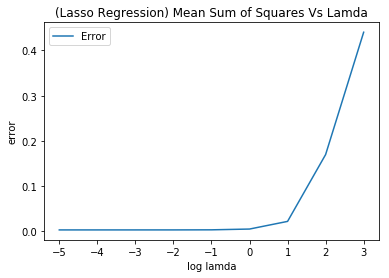

In [141]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#for i in numOfdimPlusOne:#[:-1]
#for i in lamdavalues:
ax.plot(np.log([1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),np.array(trainErrorList[1:])/450, label= 'Error')
#ax.scatter(np.log([1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),valErrorList[1:], label= 'valError')
ax.legend(loc=0) # upper left corner
ax.set_xlabel('log lamda')
ax.set_ylabel('error')
ax.set_title('(Lasso Regression) Mean Sum of Squares Vs Lamda');

In [111]:
len([0, 1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100 ,1000])

10

In [139]:
RidgeTrainError = trainErrorList[:]

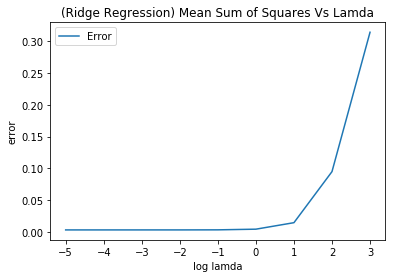

In [138]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#for i in numOfdimPlusOne:#[:-1]
#for i in lamdavalues:
ax.plot(np.log([1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),np.array(trainErrorList[1:])/450, label= 'Error')
#ax.scatter(np.log([1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),valErrorList[1:], label= 'valError')
ax.legend(loc=0) # upper left corner
ax.set_xlabel('log lamda')
ax.set_ylabel('error')
ax.set_title('(Ridge Regression) Mean Sum of Squares Vs Lamda');

In [82]:
RidgeLamdaValues = lamdavalues[:]
RidgethetaForEachLamda = thetaForEachLamda.copy()

In [84]:
LassoLamdaValues = lamdavalues[:]
LassothetaForEachLamda = thetaForEachLamda.copy()

{0: array([0.72683333, 0.02271251, 0.01918587, 0.00823218, 0.00154551,
        0.01379033, 0.06618254, 0.00961705]),
 1e-05: array([0.72683331, 0.02271251, 0.01918587, 0.00823218, 0.00154552,
        0.01379033, 0.06618253, 0.00961705]),
 0.0001: array([0.72060299, 0.02177956, 0.03104691, 0.0117263 , 0.00820548,
        0.02239763, 0.03017729, 0.02296345]),
 0.001: array([0.72683131, 0.02271289, 0.01918596, 0.00823227, 0.00154572,
        0.0137904 , 0.0661817 , 0.00961703]),
 0.01: array([0.72681314, 0.0227163 , 0.01918682, 0.00823308, 0.00154761,
        0.01379102, 0.0661741 , 0.00961683]),
 0.1: array([0.72663149, 0.02275031, 0.01919543, 0.00824116, 0.00156645,
        0.01379714, 0.06609828, 0.00961487]),
 1: array([0.72481994, 0.02294734, 0.01928698, 0.00830755, 0.001729  ,
        0.01383083, 0.06550833, 0.00962103]),
 10: array([0.70718919, 0.02442326, 0.02007991, 0.00890371, 0.00316232,
        0.01408941, 0.06047967, 0.00972369]),
 100: array([0.56882609, 0.02631752, 0.022240

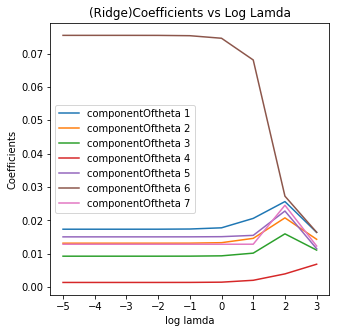

In [165]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
componentOftheta ={}
for i in range(0,numOfdimPlusOne):
    componentOftheta[i] = []
#print(componentOftheta)
for i in [0,1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000]:
    for j in range(0,numOfdimPlusOne):
        componentOftheta[j].append(thetaForEachLamda[i][j])    
for i in range(1,numOfdimPlusOne):
    ax.plot(np.log([1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),componentOftheta[i][1:], label='componentOftheta '+str(i))
ax.legend(loc=0) # upper left corner
ax.set_xlabel('log lamda')
ax.set_ylabel('Coefficients')
ax.set_title('(Ridge)Coefficients vs Log Lamda');

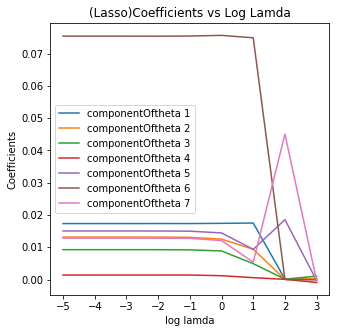

In [168]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
componentOftheta ={}
for i in range(0,numOfdimPlusOne):
    componentOftheta[i] = []
#print(componentOftheta)
for i in [0,1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000]:
    for j in range(0,numOfdimPlusOne):
        componentOftheta[j].append(thetaForEachLamda[i][j])    
for i in range(1,numOfdimPlusOne):
    ax.plot(np.log([1e-5, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),componentOftheta[i][1:], label='componentOftheta '+str(i))
ax.legend(loc=0) # upper left corner
ax.set_xlabel('log lamda')
ax.set_ylabel('Coefficients')
ax.set_title('(Lasso)Coefficients vs Log Lamda');

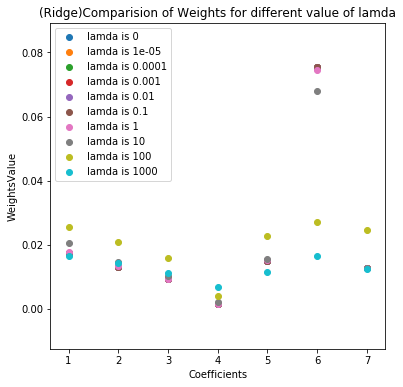

In [171]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
#for i in numOfdimPlusOne:
for i in lamdavalues:
    ax.scatter(range(1,numOfdimPlusOne),thetaForEachLamda[i][1:], label='lamda is '+str(i))
ax.legend(loc=0) # upper left corner
ax.set_xlabel('Coefficients')
ax.set_ylabel('WeightsValue')
ax.set_title('(Ridge)Comparision of Weights for different value of lamda');

In [57]:
Ypredicted = np.array([0]*len(valYvector))
valError = 0
for i in range(0,len(ValXmatrix)): 
    Ypredicted[i] = theta@ValXmatrix[i,:]
    valError += ((Ypredicted[i]-valYvector[i])**2)

In [89]:
#kfold cross validation
#divided training data into k parts 
#train on k-1 parts and test other part
#repeat this k times 
for 

In [186]:
train = AdmissionData.sample(frac = 1.0)

In [187]:
tempTrain = train.loc[:,train.columns != 'Chance of Admit ']
new_colTrain = [1]*len(train)
tempTrain.insert(loc=0, column='intercept', value=new_colTrain)
trainXmatrix = tempTrain.values
trainXmatrix -= np.mean(trainXmatrix,axis = 0)
trainXmatrix[:,1:] /= np.std(trainXmatrix.astype(float),axis = 0)[1:]
trainXmatrix[:,0] = 1
trainYvector = train['Chance of Admit '].values
fullXmatrix1=trainXmatrix.copy()
fullYvector1=trainYvector.copy()

In [193]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=450)
kf.get_n_splits(fullXmatrix1)
for lamda in [1e-2]:#, 1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100 ,1000]:
    crossValAvgErrorForEachLamda = []
    ValErrorForEachFold = []
    fold = 0
    for train_index, test_index in kf.split(fullXmatrix1):
        print('fold is '+str(fold))
        fold += 1
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = fullXmatrix1[train_index], fullXmatrix1[test_index]
        y_train, y_test = fullYvector1[train_index], fullYvector1[test_index]
        trainXmatrix = X_train
        ValXmatrix = X_test
        trainYvector = y_train
        valYvector = y_test
        numOfSamples,numOfdimPlusOne = trainXmatrix.shape
        if lamda >= 100:
            alpha = 1e-6
        else:
            alpha = 0.0005
        print("lamda is "+str(lamda))
        iterations = 0
        lamdavalues.append(lamda)
        theta = np.array([0.5]*numOfdimPlusOne) #initialization
        residual = 999
        cost = 1000
        while residual > 1e-3:
            beforetheta = theta.copy()
            print("iteration is "+str(iterations))
            beforeCost = cost
            iterations += 1
            cost = 0
            for k in range(0,numOfSamples):
                cost += getCost(trainXmatrix[k,:],trainYvector[k],theta,lamda)
            Ridge = True
            if (Rigde):#L2 regularization
                cost += (lamda*(np.sum(theta*theta))) 
                print("cost is "+str(cost))
                #updating theta by finding the gradient(tempj)
                for j in range(0,numOfdimPlusOne):
                    tempj = 0
                    for i in range(0,numOfSamples):
                        tempj += (trainXmatrix[i,j]*(trainYvector[i]-(theta@trainXmatrix[i,:])))
                        #tempj += (trainXmatrix[i,j]*np.sqrt(getCost(trainXmatrix[i,:],trainYvector[i],theta,lamda)))
                    tempj *= (-2)
                    tempj += (2*lamda*theta[j])
                    theta[j] -= (alpha*tempj)
                if(1):
                    Ypredicted = np.array([0]*len(valYvector))
                    valError = 0
                    for i in range(0,len(ValXmatrix)):
                        Ypredicted[i] = theta@ValXmatrix[i,:]
                        valError += ((Ypredicted[i]-valYvector[i])**2)
            residual = np.linalg.norm(cost-beforeCost)
        ValErrorForEachFold.append(valError/len(ValXmatrix))
        #print(ValErrorForEachFold)
    crossValAvgErrorForEachLamda.append(np.mean(ValErrorForEachFold))

fold is 0
lamda is 0.01
iteration is 0
cost is 3395.6401848443275
iteration is 1
cost is 108.61350605875998
iteration is 2
cost is 73.44337766281556
iteration is 3
cost is 47.92522543942202
iteration is 4
cost is 32.74997106327854
iteration is 5
cost is 23.5737310675918
iteration is 6
cost is 17.75317667160852
iteration is 7
cost is 13.872366627787585
iteration is 8
cost is 11.160627508975605
iteration is 9
cost is 9.186575381127684
iteration is 10
cost is 7.700678321392792
iteration is 11
cost is 6.552940930562164
iteration is 12
cost is 5.649198878454815
iteration is 13
cost is 4.9275609153934266
iteration is 14
cost is 4.345485155493118
iteration is 15
cost is 3.872527654590189
iteration is 16
cost is 3.486153924908041
iteration is 17
cost is 3.169231563137637
iteration is 18
cost is 2.9084662278685083
iteration is 19
cost is 2.6933825706659693
iteration is 20
cost is 2.515631438462109
iteration is 21
cost is 2.3685005446278735
iteration is 22
cost is 2.2465575564506217
iteration is

iteration is 42
cost is 1.6609752035804648
iteration is 43
cost is 1.6583881239013794
iteration is 44
cost is 1.6562337121049393
iteration is 45
cost is 1.6544396686290577
iteration is 46
cost is 1.6529457693440213
iteration is 47
cost is 1.6517018483556192
iteration is 48
cost is 1.6506661182734812
iteration is 49
cost is 1.6498037712703562
fold is 4
lamda is 0.01
iteration is 0
cost is 3399.703040063592
iteration is 1
cost is 108.41757749948054
iteration is 2
cost is 73.34586237029174
iteration is 3
cost is 47.90209579217771
iteration is 4
cost is 32.77143914179688
iteration is 5
cost is 23.617772246722275
iteration is 6
cost is 17.806302371253338
iteration is 7
cost is 13.926787776717674
iteration is 8
cost is 11.212092481798198
iteration is 9
cost is 9.232978192094404
iteration is 10
cost is 7.741192753467796
iteration is 11
cost is 6.5874848793070635
iteration is 12
cost is 5.678102709101009
iteration is 13
cost is 4.951362607846438
iteration is 14
cost is 4.364805198800496
iterat

iteration is 46
cost is 1.6518397599169437
iteration is 47
cost is 1.6506056463941268
iteration is 48
cost is 1.6495782311789249
iteration is 49
cost is 1.6487229319743284
fold is 8
lamda is 0.01
iteration is 0
cost is 3394.557375548745
iteration is 1
cost is 107.96420358015018
iteration is 2
cost is 73.05320680751139
iteration is 3
cost is 47.68780606343565
iteration is 4
cost is 32.59899252262743
iteration is 5
cost is 23.47695565333977
iteration is 6
cost is 17.691248018234962
iteration is 7
cost is 13.832709563695765
iteration is 8
cost is 11.134962122184424
iteration is 9
cost is 9.169513795697666
iteration is 10
cost is 7.688788019951107
iteration is 11
cost is 6.5440911648298705
iteration is 12
cost is 5.642107372674756
iteration is 13
cost is 4.921485616087098
iteration is 14
cost is 4.34001905430656
iteration is 15
cost is 3.867465018280314
iteration is 16
cost is 3.4814048789710808
iteration is 17
cost is 3.1647687915169582
iteration is 18
cost is 2.9042926407696643
iteration

iteration is 5
cost is 23.657465510501126
iteration is 6
cost is 17.862461767949085
iteration is 7
cost is 13.974375514662535
iteration is 8
cost is 11.24580424360761
iteration is 9
cost is 9.254529359177493
iteration is 10
cost is 7.753955694937357
iteration is 11
cost is 6.594537370502159
iteration is 12
cost is 5.681722218820794
iteration is 13
cost is 4.953058302171939
iteration is 14
cost is 4.365500617248277
iteration is 15
cost is 3.888214189466208
iteration is 16
cost is 3.4983778786704693
iteration is 17
cost is 3.1786533724507278
iteration is 18
cost is 2.915598228434257
iteration is 19
cost is 2.6986290539107745
iteration is 20
cost is 2.519316210685222
iteration is 21
cost is 2.3708860749659637
iteration is 22
cost is 2.2478585618938562
iteration is 23
cost is 2.145776311521097
iteration is 24
cost is 2.0609982201749637
iteration is 25
cost is 1.9905395198281501
iteration is 26
cost is 1.9319463664062855
iteration is 27
cost is 1.8831965160214592
iteration is 28
cost is 1.8

cost is 23.573506679225446
iteration is 6
cost is 17.765925701182375
iteration is 7
cost is 13.891981072805509
iteration is 8
cost is 11.182700168812802
iteration is 9
cost is 9.208298727068517
iteration is 10
cost is 7.720478644518989
iteration is 11
cost is 6.570094481399767
iteration is 12
cost is 5.663519005607785
iteration is 13
cost is 4.939171870730274
iteration is 14
cost is 4.354670589557067
iteration is 15
cost is 3.879635175579121
iteration is 16
cost is 3.4915386033462066
iteration is 17
cost is 3.1732250851495567
iteration is 18
cost is 2.9113622067726173
iteration is 19
cost is 2.6954315898291927
iteration is 20
cost is 2.517041635285318
iteration is 21
cost is 2.3694410909025625
iteration is 22
cost is 2.2471634196537598
iteration is 23
cost is 2.14576000393421
iteration is 24
cost is 2.061595965561443
iteration is 25
cost is 1.991691503468711
iteration is 26
cost is 1.9335971417244473
iteration is 27
cost is 1.885294726866358
iteration is 28
cost is 1.8451182690865513
i

iteration is 18
cost is 2.890883577487733
iteration is 19
cost is 2.6780120891305597
iteration is 20
cost is 2.502219850341383
iteration is 21
cost is 2.356808730230992
iteration is 22
cost is 2.2363659617987115
iteration is 23
cost is 2.136493657219645
iteration is 24
cost is 2.053602875546448
iteration is 25
cost is 1.9847543421584812
iteration is 26
cost is 1.927533712543554
iteration is 27
cost is 1.8799529158938415
iteration is 28
cost is 1.840371493545966
iteration is 29
cost is 1.8074334576333535
iteration is 30
cost is 1.7800163192318623
iteration is 31
cost is 1.7571897400172616
iteration is 32
cost is 1.7381818496517232
iteration is 33
cost is 1.7223517081929454
iteration is 34
cost is 1.709166721979513
iteration is 35
cost is 1.6981840721272616
iteration is 36
cost is 1.6890354075478138
iteration is 37
cost is 1.6814142039420816
iteration is 38
cost is 1.6750653071546615
iteration is 39
cost is 1.6697762713893844
iteration is 40
cost is 1.6653701758525632
iteration is 41
cos

iteration is 10
cost is 7.747210499730359
iteration is 11
cost is 6.60031799822626
iteration is 12
cost is 5.695025595925028
iteration is 13
cost is 4.97049950033522
iteration is 14
cost is 4.384875259457895
iteration is 15
cost is 3.9081349810188657
iteration is 16
cost is 3.518004535604329
iteration is 17
cost is 3.1975033961829404
iteration is 18
cost is 2.9334188218769905
iteration is 19
cost is 2.715312250373824
iteration is 20
cost is 2.5348433937565598
iteration is 21
cost is 2.3852920418516526
iteration is 22
cost is 2.2612084145643427
iteration is 23
cost is 2.158150710792386
iteration is 24
cost is 2.0724840764156673
iteration is 25
cost is 2.001224215580874
iteration is 26
cost is 1.9419142734207326
iteration is 27
cost is 1.8925270013912394
iteration is 28
cost is 1.8513864256600876
iteration is 29
cost is 1.8171047389579227
iteration is 30
cost is 1.7885311891587143
iteration is 31
cost is 1.7647104969813021
iteration is 32
cost is 1.7448488941538636
iteration is 33
cost i

iteration is 19
cost is 2.6879122259789185
iteration is 20
cost is 2.5108735163600273
iteration is 21
cost is 2.364394604585286
iteration is 22
cost is 2.2430446305377805
iteration is 23
cost is 2.1424057231757407
iteration is 24
cost is 2.05886930241361
iteration is 25
cost is 1.9894779695450593
iteration is 26
cost is 1.9318012824866277
iteration is 27
cost is 1.8838372229317395
iteration is 28
cost is 1.8439334457095866
iteration is 29
cost is 1.810723944458694
iteration is 30
cost is 1.783077847534917
iteration is 31
cost is 1.7600578345554858
iteration is 32
cost is 1.7408862346589493
iteration is 33
cost is 1.7249172941523299
iteration is 34
cost is 1.7116144243731097
iteration is 35
cost is 1.7005314880470723
iteration is 36
cost is 1.6912973736401826
iteration is 37
cost is 1.6836032561524554
iteration is 38
cost is 1.6771920596754482
iteration is 39
cost is 1.6718497293610848
iteration is 40
cost is 1.6673979938451304
iteration is 41
cost is 1.6636883578585102
iteration is 42


iteration is 14
cost is 4.340807053079909
iteration is 15
cost is 3.866826556529919
iteration is 16
cost is 3.4799640528489286
iteration is 17
cost is 3.1629260690403247
iteration is 18
cost is 2.902300501937441
iteration is 19
cost is 2.6875253232933813
iteration is 20
cost is 2.510187567628131
iteration is 21
cost is 2.363528284023837
iteration is 22
cost is 2.2420814825294553
iteration is 23
cost is 2.1414039028044294
iteration is 24
cost is 2.057868644851777
iteration is 25
cost is 1.9885051101919793
iteration is 26
cost is 1.9308733656524268
iteration is 27
cost is 1.8829645924064087
iteration is 28
cost is 1.843121601466626
iteration is 29
cost is 1.8099749694451641
iteration is 30
cost is 1.782391450414662
iteration is 31
cost is 1.7594321127349384
iteration is 32
cost is 1.7403182324245474
iteration is 33
cost is 1.7244034098599128
iteration is 34
cost is 1.7111507058341069
iteration is 35
cost is 1.700113844742281
iteration is 36
cost is 1.6909217268770806
iteration is 37
cost

iteration is 15
cost is 3.8692237779973695
iteration is 16
cost is 3.481068373571047
iteration is 17
cost is 3.162675642502352
iteration is 18
cost is 2.9007411206073526
iteration is 19
cost is 2.684761197744021
iteration is 20
cost is 2.506349780909785
iteration is 21
cost is 2.358755284828536
iteration is 22
cost is 2.23650761323556
iteration is 23
cost is 2.135153173418736
iteration is 24
cost is 2.0510518441760057
iteration is 25
cost is 1.9812189699937832
iteration is 26
cost is 1.9232009288439866
iteration is 27
cost is 1.8749762349316517
iteration is 28
cost is 1.8348763596768107
iteration is 29
cost is 1.8015219595063434
iteration is 30
cost is 1.773771254780149
iteration is 31
cost is 1.750678065780976
iteration is 32
cost is 1.7314575733240716
iteration is 33
cost is 1.715458292769354
iteration is 34
cost is 1.702139070334138
iteration is 35
cost is 1.691050156469885
iteration is 36
cost is 1.6818176015920667
iteration is 37
cost is 1.6741303682503794
iteration is 38
cost is 

iteration is 2
cost is 72.8797162195968
iteration is 3
cost is 47.59807445869215
iteration is 4
cost is 32.54614114111191
iteration is 5
cost is 23.443042831169613
iteration is 6
cost is 17.668381614321337
iteration is 7
cost is 13.817059037414873
iteration is 8
cost is 11.12439237928869
iteration is 9
cost is 9.162633607370083
iteration is 10
cost is 7.684582382319282
iteration is 11
cost is 6.54178141648888
iteration is 12
cost is 5.641092335384735
iteration is 13
cost is 4.9213082818541185
iteration is 14
cost is 4.340340557236566
iteration is 15
cost is 3.8680413576508643
iteration is 16
cost is 3.4820660887289883
iteration is 17
cost is 3.165401034723156
iteration is 18
cost is 2.9048234822643444
iteration is 19
cost is 2.689899185057404
iteration is 20
cost is 2.5123007709880723
iteration is 21
cost is 2.365325902445504
iteration is 22
cost is 2.243545282767384
iteration is 23
cost is 2.142538687708826
iteration is 24
cost is 2.0586929506997427
iteration is 25
cost is 1.989044941

iteration is 13
cost is 4.94150387732414
iteration is 14
cost is 4.3565566158152125
iteration is 15
cost is 3.881147305903098
iteration is 16
cost is 3.49273283599829
iteration is 17
cost is 3.1741493893229413
iteration is 18
cost is 2.9120596999889226
iteration is 19
cost is 2.695941442181142
iteration is 20
cost is 2.5173990996914304
iteration is 21
cost is 2.3696773383485334
iteration is 22
cost is 2.247305460151821
iteration is 23
cost is 2.1458307716995066
iteration is 24
cost is 2.0616145560174615
iteration is 25
cost is 1.991673517641221
iteration is 26
cost is 1.9335550898365443
iteration is 27
cost is 1.885238450840444
iteration is 28
cost is 1.8450553547487438
iteration is 29
cost is 1.8116264158501565
iteration is 30
cost is 1.7838095607053297
iteration is 31
cost is 1.7606581371203132
iteration is 32
cost is 1.741386739234612
iteration is 33
cost is 1.7253432342696104
iteration is 34
cost is 1.7119857994758554
iteration is 35
cost is 1.7008640251514437
iteration is 36
cost 

iteration is 17
cost is 3.1766116335337564
iteration is 18
cost is 2.913460497948615
iteration is 19
cost is 2.6963904875069185
iteration is 20
cost is 2.517005239601586
iteration is 21
cost is 2.3685439322255823
iteration is 22
cost is 2.2455278141351105
iteration is 23
cost is 2.1434949866904596
iteration is 24
cost is 2.0587972867386797
iteration is 25
cost is 1.9884422842031186
iteration is 26
cost is 1.9299688974178881
iteration is 27
cost is 1.8813485574622872
iteration is 28
cost is 1.840906086532743
iteration is 29
cost is 1.807255969470051
iteration is 30
cost is 1.779250759258762
iteration is 31
cost is 1.7559391225814007
iteration is 32
cost is 1.7365315951217557
iteration is 33
cost is 1.7203725383926884
iteration is 34
cost is 1.7069171101304113
iteration is 35
cost is 1.6957123059190506
iteration is 36
cost is 1.6863813198031226
iteration is 37
cost is 1.678610619953224
iteration is 38
cost is 1.6721392520101113
iteration is 39
cost is 1.6667499749665522
iteration is 40
c

iteration is 48
cost is 1.649414601683412
iteration is 49
cost is 1.6485592108873337
fold is 58
lamda is 0.01
iteration is 0
cost is 3395.015726877392
iteration is 1
cost is 108.4623391755621
iteration is 2
cost is 73.25805317128324
iteration is 3
cost is 47.7920962156131
iteration is 4
cost is 32.66970835486873
iteration is 5
cost is 23.532174947068974
iteration is 6
cost is 17.735775203594763
iteration is 7
cost is 13.868300843066665
iteration is 8
cost is 11.16286499465881
iteration is 9
cost is 9.190928674365352
iteration is 10
cost is 7.704859590196067
iteration is 11
cost is 6.555846142810008
iteration is 12
cost is 5.650421529832211
iteration is 13
cost is 4.927080632433957
iteration is 14
cost is 4.343476387601264
iteration is 15
cost is 3.8692465258572004
iteration is 16
cost is 3.481874262798262
iteration is 17
cost is 3.1642110650142343
iteration is 18
cost is 2.902930624823826
iteration is 19
cost is 2.68752020088005
iteration is 20
cost is 2.5095935652040846
iteration is 2

iteration is 13
cost is 4.915003165997221
iteration is 14
cost is 4.333171888340987
iteration is 15
cost is 3.8602308332859003
iteration is 16
cost is 3.4737885680834766
iteration is 17
cost is 3.156790635374088
iteration is 18
cost is 2.8959809897278346
iteration is 19
cost is 2.6808991514681164
iteration is 20
cost is 2.503197627875745
iteration is 21
cost is 2.3561589194164996
iteration is 22
cost is 2.2343424443457827
iteration is 23
cost is 2.133319653180722
iteration is 24
cost is 2.049471279229123
iteration is 25
cost is 1.9798297482081966
iteration is 26
cost is 1.9219552297095708
iteration is 27
cost is 1.8738372371578518
iteration is 28
cost is 1.8338159216823886
iteration is 29
cost is 1.8005187264418752
iteration is 30
cost is 1.7728091358549474
iteration is 31
cost is 1.7497450240280938
iteration is 32
cost is 1.7305446732598972
iteration is 33
cost is 1.7145589572960305
iteration is 34
cost is 1.7012485050990283
iteration is 35
cost is 1.6901649067627547
iteration is 36
c

cost is 4.301905207515024
iteration is 15
cost is 3.8374392926439063
iteration is 16
cost is 3.457823976182268
iteration is 17
cost is 3.146317786515483
iteration is 18
cost is 2.8899178930084495
iteration is 19
cost is 2.6783695875451783
iteration is 20
cost is 2.503492877106836
iteration is 21
cost is 2.3587066279558444
iteration is 22
cost is 2.238681200173724
iteration is 23
cost is 2.139078198711847
iteration is 24
cost is 2.056351516564407
iteration is 25
cost is 1.9875928560243878
iteration is 26
cost is 1.9304103349213428
iteration is 27
cost is 1.882832183317448
iteration is 28
cost is 1.8432297566209526
iteration is 29
cost is 1.8102555980014112
iteration is 30
cost is 1.782793339430874
iteration is 31
cost is 1.759916991059626
iteration is 32
cost is 1.7408577273757908
iteration is 33
cost is 1.7249766958696373
iteration is 34
cost is 1.711742689592101
iteration is 35
cost is 1.700713766364405
iteration is 36
cost is 1.6915220836584877
iteration is 37
cost is 1.6838613630996

iteration is 11
cost is 6.613988500195493
iteration is 12
cost is 5.700782224777058
iteration is 13
cost is 4.970702301596408
iteration is 14
cost is 4.381269166674204
iteration is 15
cost is 3.9020090701484964
iteration is 16
cost is 3.5103079827927206
iteration is 17
cost is 3.1889306625527776
iteration is 18
cost is 2.924472795750238
iteration is 19
cost is 2.706351459605217
iteration is 20
cost is 2.5261175891190377
iteration is 21
cost is 2.3769691980806233
iteration is 22
cost is 2.2533953267724374
iteration is 23
cost is 2.1509087604505055
iteration is 24
cost is 2.0658413194567853
iteration is 25
cost is 1.9951846478838018
iteration is 26
cost is 1.9364649167243893
iteration is 27
cost is 1.8876432990143042
iteration is 28
cost is 1.8470363243599581
iteration is 29
cost is 1.813251748799578
iteration is 30
cost is 1.785136649219875
iteration is 31
cost is 1.7617352255248067
iteration is 32
cost is 1.742254363697002
iteration is 33
cost is 1.7260354394929835
iteration is 34
cost

cost is 48.10001932123373
iteration is 4
cost is 32.94526312930537
iteration is 5
cost is 23.746673690607082
iteration is 6
cost is 17.89346707332412
iteration is 7
cost is 13.980789365668459
iteration is 8
cost is 11.241164888286647
iteration is 9
cost is 9.24364594746343
iteration is 10
cost is 7.738275120424942
iteration is 11
cost is 6.574448209368814
iteration is 12
cost is 5.657427792321174
iteration is 13
cost is 4.924837876098862
iteration is 14
cost is 4.333738467835902
iteration is 15
cost is 3.8533590775974216
iteration is 16
cost is 3.4608952143863836
iteration is 17
cost is 3.1389892874030285
iteration is 18
cost is 2.8741580513418112
iteration is 19
cost is 2.655767327092787
iteration is 20
cost is 2.475334503972032
iteration is 21
cost is 2.326035459405043
iteration is 22
cost is 2.2023445078093427
iteration is 23
cost is 2.0997645639427014
iteration is 24
cost is 2.0146207855290865
iteration is 25
cost is 1.9439002889126686
iteration is 26
cost is 1.885126146323081
iter

iteration is 27
cost is 1.8863707755218506
iteration is 28
cost is 1.8458708460094058
iteration is 29
cost is 1.812180005811431
iteration is 30
cost is 1.7841461619051886
iteration is 31
cost is 1.7608145177870962
iteration is 32
cost is 1.7413930612866149
iteration is 33
cost is 1.72522430313586
iteration is 34
cost is 1.711762073671398
iteration is 35
cost is 1.700552428964735
iteration is 36
cost is 1.6912179074789804
iteration is 37
cost is 1.6834445271104441
iteration is 38
cost is 1.676971029824821
iteration is 39
cost is 1.6715799742209496
iteration is 40
cost is 1.6670903506619423
iteration is 41
cost is 1.6633514532124916
iteration is 42
cost is 1.6602377906530443
iteration is 43
cost is 1.6576448577227128
iteration is 44
cost is 1.6554856193429883
iteration is 45
cost is 1.6536875863505207
iteration is 46
cost is 1.6521903823601138
iteration is 47
cost is 1.6509437186889775
iteration is 48
cost is 1.6499057085134126
iteration is 49
cost is 1.649041463169208
fold is 82
lamda i

iteration is 12
cost is 5.646029811454093
iteration is 13
cost is 4.9257691922118685
iteration is 14
cost is 4.344413977617552
iteration is 15
cost is 3.8717946929217724
iteration is 16
cost is 3.485549705709337
iteration is 17
cost is 3.168652503216677
iteration is 18
cost is 2.907871184332485
iteration is 19
cost is 2.692765165904072
iteration is 20
cost is 2.515002845292653
iteration is 21
cost is 2.367879118503925
iteration is 22
cost is 2.24596288138061
iteration is 23
cost is 2.144832691419133
iteration is 24
cost is 2.0608744994314994
iteration is 25
cost is 1.9911244648295996
iteration is 26
cost is 1.9331453406011185
iteration is 27
cost is 1.8849283429020842
iteration is 28
cost is 1.8448146602676105
iteration is 29
cost is 1.8114322782152967
iteration is 30
cost is 1.7836448619279324
iteration is 31
cost is 1.7605102083580662
iteration is 32
cost is 1.7412463445349342
iteration is 33
cost is 1.7252037716165398
iteration is 34
cost is 1.7118426744274648
iteration is 35
cost i

cost is 3.5149413885775505
iteration is 17
cost is 3.192485588201782
iteration is 18
cost is 2.9270417272333202
iteration is 19
cost is 2.708020550218148
iteration is 20
cost is 2.5269660155280738
iteration is 21
cost is 2.3770695836825126
iteration is 22
cost is 2.2528144727849857
iteration is 23
cost is 2.1497083520059057
iteration is 24
cost is 2.064078492437441
iteration is 25
cost is 1.9929124045418813
iteration is 26
cost is 1.933732418690034
iteration is 27
cost is 1.8844960762070073
iteration is 28
cost is 1.843516434639137
iteration is 29
cost is 1.809397914813913
iteration is 30
cost is 1.7809843901179083
iteration is 31
cost is 1.757316993752148
iteration is 32
cost is 1.737599691534175
iteration is 33
cost is 1.721171096194346
iteration is 34
cost is 1.7074813240407403
iteration is 35
cost is 1.6960729438492421
iteration is 36
cost is 1.6865652603067824
iteration is 37
cost is 1.6786413243009932
iteration is 38
cost is 1.6720371800521132
iteration is 39
cost is 1.6665329520

iteration is 44
cost is 1.6565042485699453
iteration is 45
cost is 1.6546486983556903
iteration is 46
cost is 1.6531027206297562
iteration is 47
cost is 1.651814725243725
iteration is 48
cost is 1.6507417118660204
iteration is 49
cost is 1.649847840391888
fold is 96
lamda is 0.01
iteration is 0
cost is 3377.098308604812
iteration is 1
cost is 106.16624407714525
iteration is 2
cost is 71.92838175597156
iteration is 3
cost is 47.01332859018103
iteration is 4
cost is 32.14822982359225
iteration is 5
cost is 23.155740226894398
iteration is 6
cost is 17.45296321382926
iteration is 7
cost is 13.651624624766852
iteration is 8
cost is 10.995510117096748
iteration is 9
cost is 9.061462934516467
iteration is 10
cost is 7.604935632189491
iteration is 11
cost is 6.479104845695555
iteration is 12
cost is 5.591906998189939
iteration is 13
cost is 4.882888335202894
iteration is 14
cost is 4.310517035155442
iteration is 15
cost is 3.845074022825404
iteration is 16
cost is 3.4645537175427235
iteration 

iteration is 6
cost is 17.70037201054371
iteration is 7
cost is 13.841357822528861
iteration is 8
cost is 11.144355438963967
iteration is 9
cost is 9.179713584985043
iteration is 10
cost is 7.69939755933688
iteration is 11
cost is 6.554622945326643
iteration is 12
cost is 5.652147976069228
iteration is 13
cost is 4.93074860837471
iteration is 14
cost is 4.348342949787984
iteration is 15
cost is 3.874789210240733
iteration is 16
cost is 3.4877407066042845
iteration is 17
cost is 3.170173544599178
iteration is 18
cost is 2.908849188098163
iteration is 19
cost is 2.6933146464260376
iteration is 20
cost is 2.5152230809567055
iteration is 21
cost is 2.367853466434057
iteration is 22
cost is 2.245759477901895
iteration is 23
cost is 2.144505935684413
iteration is 24
cost is 2.060466889110507
iteration is 25
cost is 1.9906685011620655
iteration is 26
cost is 1.9326653338680986
iteration is 27
cost is 1.8844420297272468
iteration is 28
cost is 1.844334597168452
iteration is 29
cost is 1.810967

iteration is 7
cost is 13.908271438122092
iteration is 8
cost is 11.200587631301143
iteration is 9
cost is 9.226686658622876
iteration is 10
cost is 7.738520125237268
iteration is 11
cost is 6.587200852423801
iteration is 12
cost is 5.679324606339728
iteration is 13
cost is 4.9534852469099695
iteration is 14
cost is 4.367427013397426
iteration is 15
cost is 3.8908564835443946
iteration is 16
cost is 3.501301817103483
iteration is 17
cost is 3.1816392057356766
iteration is 18
cost is 2.9185518038966
iteration is 19
cost is 2.701525680946967
iteration is 20
cost is 2.522166500775327
iteration is 21
cost is 2.3737159167333
iteration is 22
cost is 2.2506979091892245
iteration is 23
cost is 2.148653319394842
iteration is 24
cost is 2.0639365364675806
iteration is 25
cost is 1.9935573754121472
iteration is 26
cost is 1.9350566399925682
iteration is 27
cost is 1.8864072828372351
iteration is 28
cost is 1.845935309483451
iteration is 29
cost is 1.8122560911446048
iteration is 30
cost is 1.7842

iteration is 43
cost is 1.6573309128611633
iteration is 44
cost is 1.6552015771533342
iteration is 45
cost is 1.6534280134116195
iteration is 46
cost is 1.6519508344878389
iteration is 47
cost is 1.6507205598283146
iteration is 48
cost is 1.6496959631196022
iteration is 49
cost is 1.6488426957909663
fold is 112
lamda is 0.01
iteration is 0
cost is 3378.31567641628
iteration is 1
cost is 107.50066024128239
iteration is 2
cost is 72.46758895605274
iteration is 3
cost is 47.24642409059937
iteration is 4
cost is 32.27899669623409
iteration is 5
cost is 23.2474043065844
iteration is 6
cost is 17.526566780290167
iteration is 7
cost is 13.714841332592
iteration is 8
cost is 11.051419920549375
iteration is 9
cost is 9.111433105762902
iteration is 10
cost is 7.649663330223911
iteration is 11
cost is 6.519030754287716
iteration is 12
cost is 5.627386467389818
iteration is 13
cost is 4.914258710380431
iteration is 14
cost is 4.33811848856382
iteration is 15
cost is 3.8692503434787944
iteration is

iteration is 23
cost is 2.145117448262547
iteration is 24
cost is 2.0608899073662186
iteration is 25
cost is 1.9909433053575625
iteration is 26
cost is 1.9328233743015961
iteration is 27
cost is 1.8845080071731017
iteration is 28
cost is 1.8443280006923797
iteration is 29
cost is 1.8109032664979607
iteration is 30
cost is 1.7830912239407486
iteration is 31
cost is 1.7599448618867264
iteration is 32
cost is 1.7406785267998504
iteration is 33
cost is 1.7246399207936043
iteration is 34
cost is 1.7112871165447476
iteration is 35
cost is 1.7001696435463411
iteration is 36
cost is 1.6909128915634162
iteration is 37
cost is 1.6832052263038397
iteration is 38
cost is 1.6767873294168494
iteration is 39
cost is 1.6714433675068188
iteration is 40
cost is 1.6669936685093147
iteration is 41
cost is 1.6632886427368216
iteration is 42
cost is 1.660203733356066
iteration is 43
cost is 1.6576352194439827
iteration is 44
cost is 1.655496725957743
iteration is 45
cost is 1.6537163203957514
iteration is 4

iteration is 14
cost is 4.353873048786134
iteration is 15
cost is 3.8766485946193856
iteration is 16
cost is 3.4868380435660247
iteration is 17
cost is 3.1671746867921526
iteration is 18
cost is 2.9042434864863265
iteration is 19
cost is 2.687463890558284
iteration is 20
cost is 2.508397042803513
iteration is 21
cost is 2.3602554281048307
iteration is 22
cost is 2.2375444374430367
iteration is 23
cost is 2.135793548490482
iteration is 24
cost is 2.051350669352663
iteration is 25
cost is 1.9812223876721786
iteration is 26
cost is 1.9229484073340122
iteration is 27
cost is 1.8745019348210348
iteration is 28
cost is 1.8342100556470635
iteration is 29
cost is 1.8006896908128809
iteration is 30
cost is 1.7727958116724767
iteration is 31
cost is 1.7495793763482277
iteration is 32
cost is 1.7302530282857724
iteration is 33
cost is 1.7141630292620817
iteration is 34
cost is 1.7007662260400922
iteration is 35
cost is 1.6896110999634777
iteration is 36
cost is 1.6803221418778573
iteration is 37


iteration is 34
cost is 1.7124314353637042
iteration is 35
cost is 1.7010167407639034
iteration is 36
cost is 1.691504441032164
iteration is 37
cost is 1.683577267874442
iteration is 38
cost is 1.6769709905096288
iteration is 39
cost is 1.671465500242416
iteration is 40
cost is 1.6668774105936937
iteration is 41
cost is 1.663053909898205
iteration is 42
cost is 1.659867650636771
iteration is 43
cost is 1.657212498104073
iteration is 44
cost is 1.654999992181793
iteration is 45
cost is 1.653156401430873
iteration is 46
cost is 1.6516202695600533
iteration is 47
cost is 1.6503403714533456
iteration is 48
cost is 1.6492740100471566
iteration is 49
cost is 1.6483855969946255
fold is 127
lamda is 0.01
iteration is 0
cost is 3399.58357883912
iteration is 1
cost is 108.65352043958796
iteration is 2
cost is 73.42149185845948
iteration is 3
cost is 47.908842215319495
iteration is 4
cost is 32.756259245011144
iteration is 5
cost is 23.595772700295132
iteration is 6
cost is 17.781761931658817
ite

iteration is 40
cost is 1.6675573806651443
iteration is 41
cost is 1.6638186110946844
iteration is 42
cost is 1.660704371207831
iteration is 43
cost is 1.6581103988417418
iteration is 44
cost is 1.6559498370190289
iteration is 45
cost is 1.6541503255711711
iteration is 46
cost is 1.6526515801525885
iteration is 47
cost is 1.6514033764392735
iteration is 48
cost is 1.6503638713505735
iteration is 49
cost is 1.6494982047201028
fold is 131
lamda is 0.01
iteration is 0
cost is 3397.6971079468794
iteration is 1
cost is 108.61643525860609
iteration is 2
cost is 73.38031451657164
iteration is 3
cost is 47.87713241646432
iteration is 4
cost is 32.735850819513395
iteration is 5
cost is 23.590171817458472
iteration is 6
cost is 17.79134307831329
iteration is 7
cost is 13.923734935665646
iteration is 8
cost is 11.218506094604274
iteration is 9
cost is 9.24619625254558
iteration is 10
cost is 7.758866555755291
iteration is 11
cost is 6.607719145756939
iteration is 12
cost is 5.699442491469673
iter

iteration is 4
cost is 32.680127689052036
iteration is 5
cost is 23.538149216992462
iteration is 6
cost is 17.739598885937895
iteration is 7
cost is 13.871803888440969
iteration is 8
cost is 11.166892435247721
iteration is 9
cost is 9.195697616013025
iteration is 10
cost is 7.710297287709745
iteration is 11
cost is 6.56178492465266
iteration is 12
cost is 5.656688793051606
iteration is 13
cost is 4.9335316878350115
iteration is 14
cost is 4.350000979105136
iteration is 15
cost is 3.87576521634711
iteration is 16
cost is 3.4883321228652453
iteration is 17
cost is 3.170571610706297
iteration is 18
cost is 2.9091708930006717
iteration is 19
cost is 2.6936270209546183
iteration is 20
cost is 2.515560818335957
iteration is 21
cost is 2.3682312185085896
iteration is 22
cost is 2.246180143633058
iteration is 23
cost is 2.1449660604239877
iteration is 24
cost is 2.0609600527810366
iteration is 25
cost is 1.9911873494157395
iteration is 26
cost is 1.9332027207240454
iteration is 27
cost is 1.88

cost is 32.73666330897461
iteration is 5
cost is 23.59454487374548
iteration is 6
cost is 17.788858521457062
iteration is 7
cost is 13.912242641010609
iteration is 8
cost is 11.1988908963149
iteration is 9
cost is 9.220358857077093
iteration is 10
cost is 7.728885930365315
iteration is 11
cost is 6.575498324648421
iteration is 12
cost is 5.666572898923929
iteration is 13
cost is 4.940460861348271
iteration is 14
cost is 4.354685725382298
iteration is 15
cost is 3.8787711307330537
iteration is 16
cost is 3.4901021300843245
iteration is 17
cost is 3.171447742631788
iteration is 18
cost is 2.9094139272183464
iteration is 19
cost is 2.693433367235254
iteration is 20
cost is 2.515076587881193
iteration is 21
cost is 2.367563680963105
iteration is 22
cost is 2.2454068937693115
iteration is 23
cost is 2.144142248736463
iteration is 24
cost is 2.0601240214788823
iteration is 25
cost is 1.9903649806428823
iteration is 26
cost is 1.9324107607699175
iteration is 27
cost is 1.8842401762008771
iter

iteration is 16
cost is 3.5036267082692807
iteration is 17
cost is 3.1834960917474597
iteration is 18
cost is 2.919985381870398
iteration is 19
cost is 2.702580229158775
iteration is 20
cost is 2.522883269146632
iteration is 21
cost is 2.3741320349679467
iteration is 22
cost is 2.250846194024354
iteration is 23
cost is 2.1485625548187834
iteration is 24
cost is 2.0636319556049667
iteration is 25
cost is 1.9930611857523624
iteration is 26
cost is 1.934388509820676
iteration is 27
cost is 1.8855847544018711
iteration is 28
cost is 1.8449741318564246
iteration is 29
cost is 1.811170479752849
iteration is 30
cost is 1.7830256526930464
iteration is 31
cost is 1.7595875675025598
iteration is 32
cost is 1.7400659667457965
iteration is 33
cost is 1.723804388495755
iteration is 34
cost is 1.7102571515441607
iteration is 35
cost is 1.6989704117563251
iteration is 36
cost is 1.6895665360999836
iteration is 37
cost is 1.6817311897396163
iteration is 38
cost is 1.6752026485437872
iteration is 39
co

iteration is 23
cost is 2.1451754189694334
iteration is 24
cost is 2.061011290699032
iteration is 25
cost is 1.9911127825968433
iteration is 26
cost is 1.9330290447565064
iteration is 27
cost is 1.884740652238728
iteration is 28
cost is 1.8445805042975842
iteration is 29
cost is 1.811170158980297
iteration is 30
cost is 1.783368323102218
iteration is 31
cost is 1.760228990508828
iteration is 32
cost is 1.7409672903314493
iteration is 33
cost is 1.7249315324335623
iteration is 34
cost is 1.7115802596934575
iteration is 35
cost is 1.7004633637503195
iteration is 36
cost is 1.691206511755069
iteration is 37
cost is 1.6834982804489098
iteration is 38
cost is 1.677079510707907
iteration is 39
cost is 1.6717344880462832
iteration is 40
cost is 1.6672836280595114
iteration is 41
cost is 1.6635774046152625
iteration is 42
cost is 1.6604913059506745
iteration is 43
cost is 1.6579216421377008
iteration is 44
cost is 1.6557820585022773
iteration is 45
cost is 1.654000634973506
iteration is 46
cos

iteration is 40
cost is 1.6642506040658596
iteration is 41
cost is 1.6605522145028941
iteration is 42
cost is 1.6574706108399138
iteration is 43
cost is 1.6549029908331914
iteration is 44
cost is 1.6527636856201517
iteration is 45
cost is 1.6509813015232782
iteration is 46
cost is 1.6494963400147444
iteration is 47
cost is 1.6482592153377804
iteration is 48
cost is 1.6472286030078156
iteration is 49
cost is 1.6463700637470846
fold is 158
lamda is 0.01
iteration is 0
cost is 3398.2466946322206
iteration is 1
cost is 108.63938202994179
iteration is 2
cost is 73.40127252614049
iteration is 3
cost is 47.87443588432485
iteration is 4
cost is 32.719484618028766
iteration is 5
cost is 23.567624472867777
iteration is 6
cost is 17.766705688661105
iteration is 7
cost is 13.898952985392004
iteration is 8
cost is 11.194404597998945
iteration is 9
cost is 9.223101245479818
iteration is 10
cost is 7.7369263823864864
iteration is 11
cost is 6.587044196654776
iteration is 12
cost is 5.6801491179781545

cost is 1.654371772661877
iteration is 46
cost is 1.6528923782728182
iteration is 47
cost is 1.651660929890113
iteration is 48
cost is 1.6506359128725103
iteration is 49
cost is 1.6497827580220021
fold is 163
lamda is 0.01
iteration is 0
cost is 3400.772810963778
iteration is 1
cost is 108.45905996330255
iteration is 2
cost is 73.32020721463417
iteration is 3
cost is 47.82036854096694
iteration is 4
cost is 32.67486879461362
iteration is 5
cost is 23.52679360345199
iteration is 6
cost is 17.72888526338637
iteration is 7
cost is 13.86466509238109
iteration is 8
cost is 11.164255897354174
iteration is 9
cost is 9.197429540689313
iteration is 10
cost is 7.715749874523933
iteration is 11
cost is 6.570118077053466
iteration is 12
cost is 5.667051829629078
iteration is 13
cost is 4.945157186337716
iteration is 14
cost is 4.36224495191341
iteration is 15
cost is 3.8881160962865295
iteration is 16
cost is 3.500402962084952
iteration is 17
cost is 3.1820843894863504
iteration is 18
cost is 2.91

iteration is 40
cost is 1.6677017815468036
iteration is 41
cost is 1.6640010001902632
iteration is 42
cost is 1.660917312367633
iteration is 43
cost is 1.6583478758249623
iteration is 44
cost is 1.65620698712753
iteration is 45
cost is 1.6544232226575353
iteration is 46
cost is 1.6529370579075058
iteration is 47
cost is 1.6516988845395795
iteration is 48
cost is 1.6506673584135274
iteration is 49
cost is 1.6498080231212415
fold is 168
lamda is 0.01
iteration is 0
cost is 3399.313056159791
iteration is 1
cost is 108.66500763268029
iteration is 2
cost is 73.44422822478998
iteration is 3
cost is 47.91992893827534
iteration is 4
cost is 32.75963680702356
iteration is 5
cost is 23.597679866146997
iteration is 6
cost is 17.785849826388898
iteration is 7
cost is 13.908381500726806
iteration is 8
cost is 11.196077031137232
iteration is 9
cost is 9.219065885838866
iteration is 10
cost is 7.728999024752483
iteration is 11
cost is 6.57669219123332
iteration is 12
cost is 5.668484703171576
iterati

cost is 1.703189469422951
iteration is 35
cost is 1.6921169209807798
iteration is 36
cost is 1.6828979326344367
iteration is 37
cost is 1.6752220177244146
iteration is 38
cost is 1.6688308193950425
iteration is 39
cost is 1.663509310453229
iteration is 40
cost is 1.6590784953073128
iteration is 41
cost is 1.6553893522368675
iteration is 42
cost is 1.6523178015232247
iteration is 43
cost is 1.6497605232134243
iteration is 44
cost is 1.647631479363528
iteration is 45
cost is 1.6458590209559016
iteration is 46
cost is 1.6443834804354402
iteration is 47
cost is 1.6431551678475576
iteration is 48
cost is 1.6421327025858083
iteration is 49
cost is 1.6412816243277724
fold is 173
lamda is 0.01
iteration is 0
cost is 3394.697933049224
iteration is 1
cost is 108.11648260374781
iteration is 2
cost is 73.16991073725755
iteration is 3
cost is 47.879221680979036
iteration is 4
cost is 32.83240610939851
iteration is 5
cost is 23.725898454490945
iteration is 6
cost is 17.93961963438647
iteration is 7


iteration is 29
cost is 1.8113617282474432
iteration is 30
cost is 1.7834967835084001
iteration is 31
cost is 1.7603075122247172
iteration is 32
cost is 1.7410063807837617
iteration is 33
cost is 1.724939554742971
iteration is 34
cost is 1.7115638567552627
iteration is 35
cost is 1.7004278025792356
iteration is 36
cost is 1.69115596152316
iteration is 37
cost is 1.6834360360258689
iteration is 38
cost is 1.6770081717970071
iteration is 39
cost is 1.6716561023747352
iteration is 40
cost is 1.667199805612894
iteration is 41
cost is 1.6634894086326475
iteration is 42
cost is 1.660400125320268
iteration is 43
cost is 1.6578280489375379
iteration is 44
cost is 1.655686653695012
iteration is 45
cost is 1.653903884665814
iteration is 46
cost is 1.6524197363173165
iteration is 47
cost is 1.6511842370991228
iteration is 48
cost is 1.6501557716518842
iteration is 49
cost is 1.6492996838545522
fold is 178
lamda is 0.01
iteration is 0
cost is 3381.382562302543
iteration is 1
cost is 106.3485810961

cost is 2.1429899249918964
iteration is 24
cost is 2.059247518304933
iteration is 25
cost is 1.9897006151043286
iteration is 26
cost is 1.931909757796522
iteration is 27
cost is 1.8838651734742322
iteration is 28
cost is 1.8439078956561736
iteration is 29
cost is 1.810666310012075
iteration is 30
cost is 1.783004836887103
iteration is 31
cost is 1.759982240587967
iteration is 32
cost is 1.740817626745073
iteration is 33
cost is 1.7248626160151719
iteration is 34
cost is 1.7115785055928763
iteration is 35
cost is 1.700517477294314
iteration is 36
cost is 1.6913071019366075
iteration is 37
cost is 1.6836375384133104
iteration is 38
cost is 1.6772509424973794
iteration is 39
cost is 1.6719326925419722
iteration is 40
cost is 1.6675041125175587
iteration is 41
cost is 1.6638164314418693
iteration is 42
cost is 1.6607457654198698
iteration is 43
cost is 1.6581889466466486
iteration is 44
cost is 1.65606005470499
iteration is 45
cost is 1.6542875307560756
iteration is 46
cost is 1.6528117759

iteration is 18
cost is 2.9173997682618937
iteration is 19
cost is 2.70029211206914
iteration is 20
cost is 2.5208041245942745
iteration is 21
cost is 2.3721933527461876
iteration is 22
cost is 2.2489962530972587
iteration is 23
cost is 2.146763268428153
iteration is 24
cost is 2.0618560131685664
iteration is 25
cost is 1.9912895945265006
iteration is 26
cost is 1.9326085595787088
iteration is 27
cost is 1.8837883818954908
iteration is 28
cost is 1.8431566383820035
iteration is 29
cost is 1.809329546562294
iteration is 30
cost is 1.7811605992516082
iteration is 31
cost is 1.7576988025699571
iteration is 32
cost is 1.738154589274895
iteration is 33
cost is 1.7218719027996507
iteration is 34
cost is 1.70830526819493
iteration is 35
cost is 1.697000911829859
iteration is 36
cost is 1.687581181535292
iteration is 37
cost is 1.6797316667603734
iteration is 38
cost is 1.67319053439558
iteration is 39
cost is 1.6677396876736008
iteration is 40
cost is 1.6631974285674407
iteration is 41
cost i

cost is 5.660046429863241
iteration is 13
cost is 4.936333722781837
iteration is 14
cost is 4.352248766701991
iteration is 15
cost is 3.8774864086700824
iteration is 16
cost is 3.489572384363597
iteration is 17
cost is 3.171386429174335
iteration is 18
cost is 2.9096190288446264
iteration is 19
cost is 2.6937659096050854
iteration is 20
cost is 2.515443707592611
iteration is 21
cost is 2.367905649304868
iteration is 22
cost is 2.2456873791426073
iteration is 23
cost is 2.144341132323451
iteration is 24
cost is 2.0602321737343408
iteration is 25
cost is 1.9903805147230587
iteration is 26
cost is 1.9323363816377455
iteration is 27
cost is 1.884081332365331
iteration is 28
cost is 1.8439491543730244
iteration is 29
cost is 1.810562198288485
iteration is 30
cost is 1.7827798693285717
iteration is 31
cost is 1.7596567697460996
iteration is 32
cost is 1.740408553421202
iteration is 33
cost is 1.7243839789926576
iteration is 34
cost is 1.7110419704338582
iteration is 35
cost is 1.699932741122

iteration is 7
cost is 13.876896085028791
iteration is 8
cost is 11.165428363823844
iteration is 9
cost is 9.189072326608228
iteration is 10
cost is 7.699486161987629
iteration is 11
cost is 6.5475349198887605
iteration is 12
cost is 5.639603976100218
iteration is 13
cost is 4.9141141699258615
iteration is 14
cost is 4.328672545572677
iteration is 15
cost is 3.8528805443294165
iteration is 16
cost is 3.4641883097688178
iteration is 17
cost is 3.1454159983794643
iteration is 18
cost is 2.8832079587666013
iteration is 19
cost is 2.6670245915358177
iteration is 20
cost is 2.4884556669303266
iteration is 21
cost is 2.3407340493966187
iteration is 22
cost is 2.2183799680754923
iteration is 23
cost is 2.1169339837788455
iteration is 24
cost is 2.0327525096584034
iteration is 25
cost is 1.9628488357697902
iteration is 26
cost is 1.9047680781688154
iteration is 27
cost is 1.856487906019517
iteration is 28
cost is 1.8163391471758958
iteration is 29
cost is 1.7829419013766974
iteration is 30
cos

cost is 108.34475221144373
iteration is 2
cost is 73.10766817129904
iteration is 3
cost is 47.65920897908966
iteration is 4
cost is 32.56664137075788
iteration is 5
cost is 23.456476309243577
iteration is 6
cost is 17.682845567784376
iteration is 7
cost is 13.83352981356935
iteration is 8
cost is 11.1421521978916
iteration is 9
cost is 9.180823298954905
iteration is 10
cost is 7.702560055278988
iteration is 11
cost is 6.5591376484025785
iteration is 12
cost is 5.657589407403089
iteration is 13
cost is 4.936820447723432
iteration is 14
cost is 4.354811478407115
iteration is 15
cost is 3.8814572944032926
iteration is 16
cost is 3.4944399656245158
iteration is 17
cost is 3.176763104526611
iteration is 18
cost is 2.9152156867032906
iteration is 19
cost is 2.6993714836453733
iteration is 20
cost is 2.5209085030867935
iteration is 21
cost is 2.3731277214294373
iteration is 22
cost is 2.250601456528557
iteration is 23
cost is 2.148909683131422
iteration is 24
cost is 2.0644382707177007
iterat

iteration is 47
cost is 1.649171206203026
iteration is 48
cost is 1.6481411299685975
iteration is 49
cost is 1.6472835547067235
fold is 207
lamda is 0.01
iteration is 0
cost is 3387.5985863799733
iteration is 1
cost is 107.17625835324532
iteration is 2
cost is 72.57594626640736
iteration is 3
cost is 47.40887166423637
iteration is 4
cost is 32.41824977029133
iteration is 5
cost is 23.352288717655792
iteration is 6
cost is 17.601491282579012
iteration is 7
cost is 13.766081508493953
iteration is 8
cost is 11.084411768975913
iteration is 9
cost is 9.130563827428825
iteration is 10
cost is 7.658448513121598
iteration is 11
cost is 6.520278677200509
iteration is 12
cost is 5.623318698454729
iteration is 13
cost is 4.906606146996892
iteration is 14
cost is 4.328205070633976
iteration is 15
cost is 3.858068075211801
iteration is 16
cost is 3.4739210942024554
iteration is 17
cost is 3.158803488957797
iteration is 18
cost is 2.8995348854610676
iteration is 19
cost is 2.6857162122097042
iterati

cost is 1.664631073482755
iteration is 42
cost is 1.6614249398988727
iteration is 43
cost is 1.6587523653026033
iteration is 44
cost is 1.6565246323330296
iteration is 45
cost is 1.6546677685579931
iteration is 46
cost is 1.653120094900273
iteration is 47
cost is 1.6518301824844503
iteration is 48
cost is 1.6507551495236326
iteration is 49
cost is 1.6498592414348203
fold is 212
lamda is 0.01
iteration is 0
cost is 3353.989472521205
iteration is 1
cost is 106.84830391497516
iteration is 2
cost is 71.91004431545915
iteration is 3
cost is 46.891610408273436
iteration is 4
cost is 32.02447930121887
iteration is 5
cost is 23.052338995902247
iteration is 6
cost is 17.369521630397827
iteration is 7
cost is 13.583803110859959
iteration is 8
cost is 10.93948834946277
iteration is 9
cost is 9.014497890080182
iteration is 10
cost is 7.565121356828486
iteration is 11
cost is 6.44508910198881
iteration is 12
cost is 5.562693209949378
iteration is 13
cost is 4.857712873139327
iteration is 14
cost is

iteration is 36
cost is 1.6911874751700438
iteration is 37
cost is 1.683510492727337
iteration is 38
cost is 1.6771181080525603
iteration is 39
cost is 1.6717953534469963
iteration is 40
cost is 1.6673632795640903
iteration is 41
cost is 1.6636728994511707
iteration is 42
cost is 1.660600158514766
iteration is 43
cost is 1.6580417540320322
iteration is 44
cost is 1.6559116589744336
iteration is 45
cost is 1.654138230303425
iteration is 46
cost is 1.6526618026763453
iteration is 47
cost is 1.651432685554804
iteration is 48
cost is 1.650409495741783
iteration is 49
cost is 1.6495577689482162
fold is 217
lamda is 0.01
iteration is 0
cost is 3395.7144157787607
iteration is 1
cost is 108.58424939724702
iteration is 2
cost is 73.34292730165419
iteration is 3
cost is 47.829093672876716
iteration is 4
cost is 32.68036477698229
iteration is 5
cost is 23.530508988061783
iteration is 6
cost is 17.730139918762834
iteration is 7
cost is 13.8629143460955
iteration is 8
cost is 11.159424959603138
ite

cost is 1.7799781927340537
iteration is 31
cost is 1.756749280356866
iteration is 32
cost is 1.7373982931545462
iteration is 33
cost is 1.7212758040325336
iteration is 34
cost is 1.707841879666744
iteration is 35
cost is 1.6966473756169327
iteration is 36
cost is 1.687318503921122
iteration is 37
cost is 1.6795440772379249
iteration is 38
cost is 1.67306494891936
iteration is 39
cost is 1.6676652595386743
iteration is 40
cost is 1.6631651729038317
iteration is 41
cost is 1.6594148426190463
iteration is 42
cost is 1.656289396962531
iteration is 43
cost is 1.653684767630515
iteration is 44
cost is 1.6515142185995002
iteration is 45
cost is 1.6497054564086966
iteration is 46
cost is 1.6481982236752764
iteration is 47
cost is 1.6469422945005587
iteration is 48
cost is 1.6458958042970022
iteration is 49
cost is 1.645023858014344
fold is 222
lamda is 0.01
iteration is 0
cost is 3395.987786748931
iteration is 1
cost is 107.78579235995973
iteration is 2
cost is 73.03774335008204
iteration is 3

iteration is 25
cost is 1.9888560660471188
iteration is 26
cost is 1.9309945348681066
iteration is 27
cost is 1.88289723007849
iteration is 28
cost is 1.8429012248810546
iteration is 29
cost is 1.8096317301087945
iteration is 30
cost is 1.7819506407648418
iteration is 31
cost is 1.758914726616067
iteration is 32
cost is 1.7397415284663114
iteration is 33
cost is 1.7237814472785276
iteration is 34
cost is 1.7104948358637377
iteration is 35
cost is 1.699433149929865
iteration is 36
cost is 1.690223406268221
iteration is 37
cost is 1.6825553446814285
iteration is 38
cost is 1.676170807093847
iteration is 39
cost is 1.6708549396450345
iteration is 40
cost is 1.6664288970480698
iteration is 41
cost is 1.6627437873070359
iteration is 42
cost is 1.6596756422191812
iteration is 43
cost is 1.6571212373691115
iteration is 44
cost is 1.6549946164241707
iteration is 45
cost is 1.6532241999087378
iteration is 46
cost is 1.6517503793994157
iteration is 47
cost is 1.650523515129808
iteration is 48
co

cost is 2.6975609501860447
iteration is 20
cost is 2.516983228810814
iteration is 21
cost is 2.3675038770554027
iteration is 22
cost is 2.2436237938856576
iteration is 23
cost is 2.140860062014045
iteration is 24
cost is 2.055544706752424
iteration is 25
cost is 1.9846675724193015
iteration is 26
cost is 1.9257522226720523
iteration is 27
cost is 1.8767570599547245
iteration is 28
cost is 1.8359959948162234
iteration is 29
cost is 1.8020744434868392
iteration is 30
cost is 1.7738374505002568
iteration is 31
cost is 1.7503274712543893
iteration is 32
cost is 1.7307498966987618
iteration is 33
cost is 1.714444815134051
iteration is 34
cost is 1.700863821497082
iteration is 35
cost is 1.6895509278967509
iteration is 36
cost is 1.6801268185462355
iteration is 37
cost is 1.6722758406382559
iteration is 38
cost is 1.6657352397452723
iteration is 39
cost is 1.6602862411729564
iteration is 40
cost is 1.65574665276283
iteration is 41
cost is 1.651964724035683
iteration is 42
cost is 1.648814044

iteration is 14
cost is 4.3603080279960444
iteration is 15
cost is 3.88393828030217
iteration is 16
cost is 3.494659759639896
iteration is 17
cost is 3.1753197389117718
iteration is 18
cost is 2.91257829207447
iteration is 19
cost is 2.69590393454669
iteration is 20
cost is 2.5168896083512493
iteration is 21
cost is 2.368768245819968
iteration is 22
cost is 2.2460582812707126
iteration is 23
cost is 2.1442974386960914
iteration is 24
cost is 2.059838783951719
iteration is 25
cost is 1.989692085646217
iteration is 26
cost is 1.9313989709287582
iteration is 27
cost is 1.8829337744134103
iteration is 28
cost is 1.842624210738833
iteration is 29
cost is 1.809087519783878
iteration is 30
cost is 1.781178801386719
iteration is 31
cost is 1.757949027581143
iteration is 32
cost is 1.7386107889348015
iteration is 33
cost is 1.722510257534254
iteration is 34
cost is 1.7091041723270084
iteration is 35
cost is 1.6979409002513697
iteration is 36
cost is 1.6886448181611635
iteration is 37
cost is 1.

iteration is 5
cost is 23.608178765061403
iteration is 6
cost is 17.77675794428901
iteration is 7
cost is 13.888185348715698
iteration is 8
cost is 11.171182396587042
iteration is 9
cost is 9.193647764466919
iteration is 10
cost is 7.705459335202635
iteration is 11
cost is 6.5562028491531175
iteration is 12
cost is 5.651438996357838
iteration is 13
cost is 4.929103342366914
iteration is 14
cost is 4.346546554301496
iteration is 15
cost is 3.873257461060778
iteration is 16
cost is 3.4866582632709253
iteration is 17
cost is 3.169587403188667
iteration is 18
cost is 2.9087299507398394
iteration is 19
cost is 2.6935954066499774
iteration is 20
cost is 2.5158231541759912
iteration is 21
cost is 2.3686921167162263
iteration is 22
cost is 2.2467632150561183
iteration is 23
cost is 2.145611807135069
iteration is 24
cost is 2.061623376718407
iteration is 25
cost is 1.991835069015675
iteration is 26
cost is 1.9338112896163593
iteration is 27
cost is 1.8855451060208543
iteration is 28
cost is 1.8

iteration is 3
cost is 47.82318540096876
iteration is 4
cost is 32.66748081798094
iteration is 5
cost is 23.510104014345583
iteration is 6
cost is 17.70514704609701
iteration is 7
cost is 13.836247264232826
iteration is 8
cost is 11.133172696612675
iteration is 9
cost is 9.165220724523955
iteration is 10
cost is 7.683529840228527
iteration is 11
cost is 6.538671006255473
iteration is 12
cost is 5.636918998328235
iteration is 13
cost is 4.916702471767988
iteration is 14
cost is 4.335700524740874
iteration is 15
cost is 3.86361414460687
iteration is 16
cost is 3.4779986085488312
iteration is 17
cost is 3.161773249534201
iteration is 18
cost is 2.9016705424015434
iteration is 19
cost is 2.687226534692144
iteration is 20
cost is 2.51009461650477
iteration is 21
cost is 2.3635605260283885
iteration is 22
cost is 2.2421881535375783
iteration is 23
cost is 2.14155400646561
iteration is 24
cost is 2.058044068399764
iteration is 25
cost is 1.9886959645567273
iteration is 26
cost is 1.9310748587

cost is 1.6502172071936743
iteration is 49
cost is 1.6493629539758188
fold is 251
lamda is 0.01
iteration is 0
cost is 3396.627958693973
iteration is 1
cost is 108.5645242585017
iteration is 2
cost is 73.32348412617499
iteration is 3
cost is 47.82270630116918
iteration is 4
cost is 32.68457643303706
iteration is 5
cost is 23.539729806785637
iteration is 6
cost is 17.740416020702995
iteration is 7
cost is 13.872151715083241
iteration is 8
cost is 11.166792622321653
iteration is 9
cost is 9.195177115132086
iteration is 10
cost is 7.709408850852316
iteration is 11
cost is 6.5605931571933045
iteration is 12
cost is 5.655259794886585
iteration is 13
cost is 4.931927951156685
iteration is 14
cost is 4.348279063695314
iteration is 15
cost is 3.873974683499841
iteration is 16
cost is 3.486515115262584
iteration is 17
cost is 3.168762859202753
iteration is 18
cost is 2.9073980465694764
iteration is 19
cost is 2.6919112148469835
iteration is 20
cost is 2.5139173967001587
iteration is 21
cost is 

iteration is 43
cost is 1.6536423276763725
iteration is 44
cost is 1.6515205310654502
iteration is 45
cost is 1.6497533958212116
iteration is 46
cost is 1.6482816919101495
iteration is 47
cost is 1.6470560750676704
iteration is 48
cost is 1.6460354368774088
iteration is 49
cost is 1.6451855305079022
fold is 256
lamda is 0.01
iteration is 0
cost is 3394.012053673735
iteration is 1
cost is 107.80085449289862
iteration is 2
cost is 72.9526355293121
iteration is 3
cost is 47.626338771179924
iteration is 4
cost is 32.55934899491894
iteration is 5
cost is 23.450890760762313
iteration is 6
cost is 17.67404611984745
iteration is 7
cost is 13.821385684125135
iteration is 8
cost is 11.127551286403781
iteration is 9
cost is 9.16470810573743
iteration is 10
cost is 7.685715268991558
iteration is 11
cost is 6.542169240029849
iteration is 12
cost is 5.6409468485490954
iteration is 13
cost is 4.920824838252411
iteration is 14
cost is 4.339681210776652
iteration is 15
cost is 3.867329906803728
iterati

iteration is 40
cost is 1.6680584922873225
iteration is 41
cost is 1.6643100234287875
iteration is 42
cost is 1.6611861850368188
iteration is 43
cost is 1.6585829379757977
iteration is 44
cost is 1.6564135737492396
iteration is 45
cost is 1.654605824231738
iteration is 46
cost is 1.6530994549468754
iteration is 47
cost is 1.6518442604349515
iteration is 48
cost is 1.6507983941631175
iteration is 49
cost is 1.6499269769045308
fold is 260
lamda is 0.01
iteration is 0
cost is 3397.595895311171
iteration is 1
cost is 108.49881529427385
iteration is 2
cost is 73.22469576384985
iteration is 3
cost is 47.7209428091192
iteration is 4
cost is 32.589476695014625
iteration is 5
cost is 23.454555366732666
iteration is 6
cost is 17.665875660573793
iteration is 7
cost is 13.807889524167255
iteration is 8
cost is 11.11201067086861
iteration is 9
cost is 9.148908360444127
iteration is 10
cost is 7.670642557134999
iteration is 11
cost is 6.528336559653639
iteration is 12
cost is 5.628571097859346
itera

cost is 1.6839290793347543
iteration is 38
cost is 1.677185769965009
iteration is 39
cost is 1.6715603924917921
iteration is 40
cost is 1.666867624152542
iteration is 41
cost is 1.662952891190264
iteration is 42
cost is 1.6596872529919044
iteration is 43
cost is 1.6569631426281397
iteration is 44
cost is 1.6546908186525553
iteration is 45
cost is 1.652795408187742
iteration is 46
cost is 1.6512144419547226
iteration is 47
cost is 1.649895798861166
iteration is 48
cost is 1.6487959917431116
iteration is 49
cost is 1.6478787374033321
fold is 264
lamda is 0.01
iteration is 0
cost is 3395.15251839365
iteration is 1
cost is 108.45506748733617
iteration is 2
cost is 73.27217982740821
iteration is 3
cost is 47.82017666851035
iteration is 4
cost is 32.694505367521
iteration is 5
cost is 23.54786931978909
iteration is 6
cost is 17.74256329282179
iteration is 7
cost is 13.86854383765966
iteration is 8
cost is 11.159142478153155
iteration is 9
cost is 9.185306149866522
iteration is 10
cost is 7.6

iteration is 37
cost is 1.683587575214736
iteration is 38
cost is 1.6771212170835321
iteration is 39
cost is 1.6717353768232373
iteration is 40
cost is 1.6672495297732408
iteration is 41
cost is 1.663513337058967
iteration is 42
cost is 1.6604015845599256
iteration is 43
cost is 1.6578099756527
iteration is 44
cost is 1.6556516319125891
iteration is 45
cost is 1.653854181438969
iteration is 46
cost is 1.6523573353189045
iteration is 47
cost is 1.6511108698565033
iteration is 48
cost is 1.6500729462784873
iteration is 49
cost is 1.6492087112430265
fold is 269
lamda is 0.01
iteration is 0
cost is 3391.256410591689
iteration is 1
cost is 108.1347594777125
iteration is 2
cost is 72.94624168177867
iteration is 3
cost is 47.55918305069246
iteration is 4
cost is 32.49663793642201
iteration is 5
cost is 23.40165376855428
iteration is 6
cost is 17.63554300617016
iteration is 7
cost is 13.790040480588779
iteration is 8
cost is 11.100840575917802
iteration is 9
cost is 9.141061549142897
iteration

iteration is 29
cost is 1.8114731046208394
iteration is 30
cost is 1.7836551166834895
iteration is 31
cost is 1.760503316994403
iteration is 32
cost is 1.741231961216581
iteration is 33
cost is 1.7251886991170804
iteration is 34
cost is 1.7118315732286524
iteration is 35
cost is 1.7007100947816531
iteration is 36
cost is 1.6914496408460846
iteration is 37
cost is 1.683738566337163
iteration is 38
cost is 1.6773175420539292
iteration is 39
cost is 1.6719707227959941
iteration is 40
cost is 1.6675184234763403
iteration is 41
cost is 1.663811040257227
iteration is 42
cost is 1.660724001292904
iteration is 43
cost is 1.6581535701167995
iteration is 44
cost is 1.656013355944756
iteration is 45
cost is 1.6542314106367932
iteration is 46
cost is 1.6527478129042044
iteration is 47
cost is 1.6515126574585306
iteration is 48
cost is 1.650484380880152
iteration is 49
cost is 1.6496283675984065
fold is 273
lamda is 0.01
iteration is 0
cost is 3395.07134026607
iteration is 1
cost is 108.43412798391

cost is 1.8872119687070716
iteration is 28
cost is 1.8466815948003303
iteration is 29
cost is 1.8129429175111242
iteration is 30
cost is 1.7848508203811395
iteration is 31
cost is 1.7614556399787462
iteration is 32
cost is 1.741969045248042
iteration is 33
cost is 1.725736105972123
iteration is 34
cost is 1.712212359425483
iteration is 35
cost is 1.700944932526654
iteration is 36
cost is 1.6915569682711318
iteration is 37
cost is 1.683734754166291
iteration is 38
cost is 1.67721706715463
iteration is 39
cost is 1.6717863417143821
iteration is 40
cost is 1.6672613411244066
iteration is 41
cost is 1.6634910705140622
iteration is 42
cost is 1.6603497174898538
iteration is 43
cost is 1.6577324442779109
iteration is 44
cost is 1.6555518863137508
iteration is 45
cost is 1.6537352374942134
iteration is 46
cost is 1.6522218230064531
iteration is 47
cost is 1.6509610776490722
iteration is 48
cost is 1.6499108615591311
iteration is 49
cost is 1.64903605681209
fold is 278
lamda is 0.01
iteration 

iteration is 43
cost is 1.6574863093361076
iteration is 44
cost is 1.6553625585244556
iteration is 45
cost is 1.6535941938803869
iteration is 46
cost is 1.6521217977854865
iteration is 47
cost is 1.650895880976211
iteration is 48
cost is 1.649875223564225
iteration is 49
cost is 1.6490254935749178
fold is 283
lamda is 0.01
iteration is 0
cost is 3397.9116947267175
iteration is 1
cost is 107.82121873079275
iteration is 2
cost is 73.02636536442141
iteration is 3
cost is 47.751482179260925
iteration is 4
cost is 32.70185882769173
iteration is 5
cost is 23.592284857763115
iteration is 6
cost is 17.805746907047133
iteration is 7
cost is 13.939865740510768
iteration is 8
cost is 11.231870902791043
iteration is 9
cost is 9.255255263046626
iteration is 10
cost is 7.763530627706097
iteration is 11
cost is 6.608572073603763
iteration is 12
cost is 5.6973256440608
iteration is 13
cost is 4.968522479083072
iteration is 14
cost is 4.37993604720227
iteration is 15
cost is 3.901250077451644
iteration

iteration is 5
cost is 23.69377282110878
iteration is 6
cost is 17.846959224442898
iteration is 7
cost is 13.942004366723465
iteration is 8
cost is 11.209551179887926
iteration is 9
cost is 9.218511410372168
iteration is 10
cost is 7.719159652863288
iteration is 11
cost is 6.561088300448028
iteration is 12
cost is 5.64964584361268
iteration is 13
cost is 4.922455749298351
iteration is 14
cost is 4.336531972587189
iteration is 15
cost is 3.8610448572389044
iteration is 16
cost is 3.473137226508799
iteration is 17
cost is 3.1554144459273163
iteration is 18
cost is 2.894374188684025
iteration is 19
cost is 2.6793796670988725
iteration is 20
cost is 2.5019589355069174
iteration is 21
cost is 2.3553081788860553
iteration is 22
cost is 2.2339282845643735
iteration is 23
cost is 2.1333521859449407
iteration is 24
cost is 2.0499363229396894
iteration is 25
cost is 1.9806987750676768
iteration is 26
cost is 1.9231921859944636
iteration is 27
cost is 1.875403102983328
iteration is 28
cost is 1.8

iteration is 10
cost is 7.641455349271431
iteration is 11
cost is 6.507373162157811
iteration is 12
cost is 5.613611127768017
iteration is 13
cost is 4.899374852699075
iteration is 14
cost is 4.322874736473578
iteration is 15
cost is 3.8541860800181347
iteration is 16
cost is 3.4711349224284276
iteration is 17
cost is 3.1568407202678546
iteration is 18
cost is 2.8981862870988335
iteration is 19
cost is 2.6848218962248245
iteration is 20
cost is 2.5084883532455344
iteration is 21
cost is 2.3625385634759146
iteration is 22
cost is 2.2415881117562315
iteration is 23
cost is 2.141253290129417
iteration is 24
cost is 2.05795066193086
iteration is 25
cost is 1.988741305420769
iteration is 26
cost is 1.9312083185815687
iteration is 27
cost is 1.8833595715835387
iteration is 28
cost is 1.8435499159580224
iteration is 29
cost is 1.8104185672357878
iteration is 30
cost is 1.7828384349257296
iteration is 31
cost is 1.759874934995037
iteration is 32
cost is 1.740752379898698
iteration is 33
cost i

iteration is 48
cost is 1.6470901118370957
iteration is 49
cost is 1.6462160645161628
fold is 299
lamda is 0.01
iteration is 0
cost is 3361.430787768439
iteration is 1
cost is 106.80185387344774
iteration is 2
cost is 71.78916634501142
iteration is 3
cost is 46.75633803832633
iteration is 4
cost is 31.915024857234187
iteration is 5
cost is 22.971066331293336
iteration is 6
cost is 17.311472862972995
iteration is 7
cost is 13.54333195683275
iteration is 8
cost is 10.91185122235761
iteration is 9
cost is 8.996071203866032
iteration is 10
cost is 7.553242106695901
iteration is 11
cost is 6.437831290353533
iteration is 12
cost is 5.558671652323855
iteration is 13
cost is 4.855932332689527
iteration is 14
cost is 4.288520159215993
iteration is 15
cost is 3.8270304892894527
iteration is 16
cost is 3.4496872484482144
iteration is 17
cost is 3.1399193751402934
iteration is 18
cost is 2.884852942195687
iteration is 19
cost is 2.674330641719846
iteration is 20
cost is 2.5002460350711004
iteratio

iteration is 5
cost is 23.16082177425771
iteration is 6
cost is 17.451324774834916
iteration is 7
cost is 13.647538764729164
iteration is 8
cost is 10.990084985999376
iteration is 9
cost is 9.055095906818016
iteration is 10
cost is 7.597916712061723
iteration is 11
cost is 6.471717784342135
iteration is 12
cost is 5.584417016415506
iteration is 13
cost is 4.875519880536456
iteration is 14
cost is 4.303442683526042
iteration is 15
cost is 3.838414117054158
iteration is 16
cost is 3.4583824064258057
iteration is 17
cost is 3.1465686782509943
iteration is 18
cost is 2.8899422770938026
iteration is 19
cost is 2.678227725349001
iteration is 20
cost is 2.5032295247025496
iteration is 21
cost is 2.358354978131795
iteration is 22
cost is 2.238265832446861
iteration is 23
cost is 2.138617282351873
iteration is 24
cost is 2.055858452347128
iteration is 25
cost is 1.9870774979855381
iteration is 26
cost is 1.929879899078016
iteration is 27
cost is 1.8822919237704194
iteration is 28
cost is 1.8426

cost is 1.724236076125509
iteration is 34
cost is 1.711049330691429
iteration is 35
cost is 1.7000659874448454
iteration is 36
cost is 1.690917400519572
iteration is 37
cost is 1.6832968123463674
iteration is 38
cost is 1.6769488876221759
iteration is 39
cost is 1.6716610424962317
iteration is 40
cost is 1.6672562530495538
iteration is 41
cost is 1.663587085168409
iteration is 42
cost is 1.660530734575379
iteration is 43
cost is 1.657984903499997
iteration is 44
cost is 1.6558643710985252
iteration is 45
cost is 1.6540981397039087
iteration is 46
cost is 1.6526270594193553
iteration is 47
cost is 1.6514018503392909
iteration is 48
cost is 1.6503814554823508
iteration is 49
cost is 1.6495316689045656
fold is 310
lamda is 0.01
iteration is 0
cost is 3380.2074853629224
iteration is 1
cost is 106.82172274112656
iteration is 2
cost is 72.29261284438346
iteration is 3
cost is 47.22222709952933
iteration is 4
cost is 32.283828089378694
iteration is 5
cost is 23.250994629315095
iteration is 6


iteration is 32
cost is 1.7411195976664764
iteration is 33
cost is 1.7251278138935722
iteration is 34
cost is 1.7118128445522791
iteration is 35
cost is 1.7007259283368128
iteration is 36
cost is 1.6914938405266482
iteration is 37
cost is 1.683806069935605
iteration is 38
cost is 1.677404208572754
iteration is 39
cost is 1.6720731609007584
iteration is 40
cost is 1.6676338528266943
iteration is 41
cost is 1.663937179183633
iteration is 42
cost is 1.6608589756405707
iteration is 43
cost is 1.6582958391392004
iteration is 44
cost is 1.6561616519625912
iteration is 45
cost is 1.6543846898352905
iteration is 46
cost is 1.6529052151609374
iteration is 47
cost is 1.6516734735061827
iteration is 48
cost is 1.6506480254366378
iteration is 49
cost is 1.649794357358904
fold is 314
lamda is 0.01
iteration is 0
cost is 3376.869917323527
iteration is 1
cost is 107.65827652087629
iteration is 2
cost is 72.552426799294
iteration is 3
cost is 47.29524569958011
iteration is 4
cost is 32.308371418455195

cost is 2.2478601339799744
iteration is 23
cost is 2.146224241082072
iteration is 24
cost is 2.061883221490633
iteration is 25
cost is 1.9918458654389979
iteration is 26
cost is 1.933653405228128
iteration is 27
cost is 1.8852801572632913
iteration is 28
cost is 1.8450540600194734
iteration is 29
cost is 1.8115927303480388
iteration is 30
cost is 1.783751738372221
iteration is 31
cost is 1.7605825787049014
iteration is 32
cost is 1.7412983882141992
iteration is 33
cost is 1.725245888918875
iteration is 34
cost is 1.7118823592107895
iteration is 35
cost is 1.7007566851944225
iteration is 36
cost is 1.6914937360372233
iteration is 37
cost is 1.6837814568816842
iteration is 38
cost is 1.677360190331851
iteration is 39
cost is 1.6720138303611358
iteration is 40
cost is 1.667562486336023
iteration is 41
cost is 1.6638563939494657
iteration is 42
cost is 1.6607708574163904
iteration is 43
cost is 1.6582020457485536
iteration is 44
cost is 1.656063497176232
iteration is 45
cost is 1.654283211

cost is 1.7797259429052166
iteration is 31
cost is 1.7568197656862037
iteration is 32
cost is 1.7377476726607408
iteration is 33
cost is 1.7218660252941023
iteration is 34
cost is 1.7086399361449518
iteration is 35
cost is 1.6976246578368137
iteration is 36
cost is 1.6884502322010373
iteration is 37
cost is 1.6808088055362271
iteration is 38
cost is 1.6744441308765572
iteration is 39
cost is 1.6691428690220393
iteration is 40
cost is 1.6647273723749423
iteration is 41
cost is 1.661049693492148
iteration is 42
cost is 1.6579866068398676
iteration is 43
cost is 1.6554354699166698
iteration is 44
cost is 1.6533107805306864
iteration is 45
cost is 1.6515413119994362
iteration is 46
cost is 1.6500677284952616
iteration is 47
cost is 1.6488405995571125
iteration is 48
cost is 1.6478187466199263
iteration is 49
cost is 1.64696786582532
fold is 324
lamda is 0.01
iteration is 0
cost is 3394.7064474386693
iteration is 1
cost is 108.47913327647561
iteration is 2
cost is 73.2395342740584
iteration

iteration is 22
cost is 2.247665289519518
iteration is 23
cost is 2.14615845062416
iteration is 24
cost is 2.0618891263536923
iteration is 25
cost is 1.9918816998220539
iteration is 26
cost is 1.9336893495165057
iteration is 27
cost is 1.885295490383243
iteration is 28
cost is 1.8450349402527135
iteration is 29
cost is 1.8115304704091921
iteration is 30
cost is 1.7836414690264304
iteration is 31
cost is 1.7604222175509292
iteration is 32
cost is 1.7410878478401688
iteration is 33
cost is 1.7249864724965072
iteration is 34
cost is 1.7115763025345039
iteration is 35
cost is 1.700406812819593
iteration is 36
cost is 1.6911032060137694
iteration is 37
cost is 1.683353573996094
iteration is 38
cost is 1.6768982720606036
iteration is 39
cost is 1.6715211131363295
iteration is 40
cost is 1.6670420624143256
iteration is 41
cost is 1.6633111713044069
iteration is 42
cost is 1.6602035367569847
iteration is 43
cost is 1.6576151100959822
iteration is 44
cost is 1.6554592104775874
iteration is 45
c

iteration is 36
cost is 1.691251202196012
iteration is 37
cost is 1.683588553645216
iteration is 38
cost is 1.677206360939562
iteration is 39
cost is 1.6718906319561717
iteration is 40
cost is 1.6674631829808624
iteration is 41
cost is 1.663775625941779
iteration is 42
cost is 1.6607043728312907
iteration is 43
cost is 1.6581464827190302
iteration is 44
cost is 1.6560162075269067
iteration is 45
cost is 1.654242117839268
iteration is 46
cost is 1.652764710572425
iteration is 47
cost is 1.6515344172028683
iteration is 48
cost is 1.650509945146203
iteration is 49
cost is 1.649656896341015
fold is 334
lamda is 0.01
iteration is 0
cost is 3387.9804210032207
iteration is 1
cost is 106.9819414083555
iteration is 2
cost is 72.4716436128442
iteration is 3
cost is 47.368134545386454
iteration is 4
cost is 32.40670430641701
iteration is 5
cost is 23.352876394087296
iteration is 6
cost is 17.6064571244956
iteration is 7
cost is 13.772076961927372
iteration is 8
cost is 11.090116319528999
iteratio

cost is 13.87696290001536
iteration is 8
cost is 11.200428577631243
iteration is 9
cost is 9.246054429087186
iteration is 10
cost is 7.769786518543936
iteration is 11
cost is 6.625241629115144
iteration is 12
cost is 5.720652892698443
iteration is 13
cost is 4.995725253011369
iteration is 14
cost is 4.408978107313755
iteration is 15
cost is 3.9306683610766204
iteration is 16
cost is 3.5387180567612444
iteration is 17
cost is 3.2162853155206825
iteration is 18
cost is 2.9502536744328807
iteration is 19
cost is 2.7302496262443383
iteration is 20
cost is 2.5479750330808493
iteration is 21
cost is 2.3967351762193085
iteration is 22
cost is 2.2710938028938013
iteration is 23
cost is 2.1666141925772293
iteration is 24
cost is 2.07966074548098
iteration is 25
cost is 2.00724453127891
iteration is 26
cost is 1.9469015907214322
iteration is 27
cost is 1.896596128134609
iteration is 28
cost is 1.8546429127386446
iteration is 29
cost is 1.8196446838362603
iteration is 30
cost is 1.790441389985334

iteration is 10
cost is 7.6910102067663795
iteration is 11
cost is 6.549639882188464
iteration is 12
cost is 5.6492886454641775
iteration is 13
cost is 4.929153898918635
iteration is 14
cost is 4.347425696526062
iteration is 15
cost is 3.8741444439573263
iteration is 16
cost is 3.487089785769596
iteration is 17
cost is 3.1693277928428354
iteration is 18
cost is 2.9076851104055823
iteration is 19
cost is 2.691756332351348
iteration is 20
cost is 2.5132293141622997
iteration is 21
cost is 2.3654080876666232
iteration is 22
cost is 2.2428641043580453
iteration is 23
cost is 2.141174446624345
iteration is 24
cost is 2.0567212641270656
iteration is 25
cost is 1.9865357056162543
iteration is 26
cost is 1.9281750174430095
iteration is 27
cost is 1.8796248549317451
iteration is 28
cost is 1.83922105306362
iteration is 29
cost is 1.8055865950013414
iteration is 30
cost is 1.7775805635946649
iteration is 31
cost is 1.7542566155341401
iteration is 32
cost is 1.7348290735717147
iteration is 33
cos

iteration is 44
cost is 1.656103258909929
iteration is 45
cost is 1.6543396210395573
iteration is 46
cost is 1.6528709248965157
iteration is 47
cost is 1.651647895526652
iteration is 48
cost is 1.6506294836898394
iteration is 49
cost is 1.6497814931799013
fold is 347
lamda is 0.01
iteration is 0
cost is 3399.6775533296586
iteration is 1
cost is 108.24210890743903
iteration is 2
cost is 73.28906531207437
iteration is 3
cost is 47.85321117614867
iteration is 4
cost is 32.719509635167455
iteration is 5
cost is 23.567305618627337
iteration is 6
cost is 17.760827718914115
iteration is 7
cost is 13.887518510847611
iteration is 8
cost is 11.178886333988848
iteration is 9
cost is 9.205155996822311
iteration is 10
cost is 7.7179669215114695
iteration is 11
cost is 6.568131873841236
iteration is 12
cost is 5.6620098373574885
iteration is 13
cost is 4.938024511485081
iteration is 14
cost is 4.353805597317144
iteration is 15
cost is 3.8789874174638252
iteration is 16
cost is 3.4910563799787013
ite

iteration is 35
cost is 1.6832573452661195
iteration is 36
cost is 1.6740591172267052
iteration is 37
cost is 1.6663959815917009
iteration is 38
cost is 1.6600116574498902
iteration is 39
cost is 1.6546927245028447
iteration is 40
cost is 1.6502614235649953
iteration is 41
cost is 1.6465696775538776
iteration is 42
cost is 1.6434941223922628
iteration is 43
cost is 1.640931974733327
iteration is 44
cost is 1.6387975938856336
iteration is 45
cost is 1.6370196201726932
iteration is 46
cost is 1.6355385923163184
iteration is 47
cost is 1.6343049631505329
iteration is 48
cost is 1.6332774467395088
iteration is 49
cost is 1.6324216413346384
fold is 354
lamda is 0.01
iteration is 0
cost is 3391.5490345459607
iteration is 1
cost is 107.03433701369985
iteration is 2
cost is 72.61392266193718
iteration is 3
cost is 47.47476242540396
iteration is 4
cost is 32.473091544201075
iteration is 5
cost is 23.389846035248155
iteration is 6
cost is 17.625303267184393
iteration is 7
cost is 13.780946545391

iteration is 30
cost is 1.7828488387779684
iteration is 31
cost is 1.7596885239988413
iteration is 32
cost is 1.7404111983064192
iteration is 33
cost is 1.7243639975604876
iteration is 34
cost is 1.7110045310701345
iteration is 35
cost is 1.6998819489399715
iteration is 36
cost is 1.6906213305021107
iteration is 37
cost is 1.6829107878595289
iteration is 38
cost is 1.6764907959757713
iteration is 39
cost is 1.6711453535221137
iteration is 40
cost is 1.666694652484375
iteration is 41
cost is 1.6629889935792033
iteration is 42
cost is 1.6599037320432815
iteration is 43
cost is 1.6573350767851465
iteration is 44
cost is 1.655196597107372
iteration is 45
cost is 1.6534163166706242
iteration is 46
cost is 1.651934295214015
iteration is 47
cost is 1.6507006156588033
iteration is 48
cost is 1.6496737083083532
iteration is 49
cost is 1.6488189554780202
fold is 359
lamda is 0.01
iteration is 0
cost is 3396.134943806599
iteration is 1
cost is 108.5117998633786
iteration is 2
cost is 73.243118786

cost is 47.918361839456665
iteration is 4
cost is 32.76162324745706
iteration is 5
cost is 23.601385462735905
iteration is 6
cost is 17.789892395952656
iteration is 7
cost is 13.912059904597024
iteration is 8
cost is 11.199166435671714
iteration is 9
cost is 9.221590833634204
iteration is 10
cost is 7.731080402201333
iteration is 11
cost is 6.578465250697982
iteration is 12
cost is 5.670063891499753
iteration is 13
cost is 4.944234590720679
iteration is 14
cost is 4.358536849541266
iteration is 15
cost is 3.882539894643883
iteration is 16
cost is 3.493673824298992
iteration is 17
cost is 3.1747472737510622
iteration is 18
cost is 2.9123985355609845
iteration is 19
cost is 2.696085185308124
iteration is 20
cost is 2.5173959056907935
iteration is 21
cost is 2.3695632830835907
iteration is 22
cost is 2.2471075436471577
iteration is 23
cost is 2.1455692418192065
iteration is 24
cost is 2.061304658813972
iteration is 25
cost is 1.9913267940851116
iteration is 26
cost is 1.9331803274154968
i

iteration is 8
cost is 11.124486237040117
iteration is 9
cost is 9.161644546936154
iteration is 10
cost is 7.682699012368412
iteration is 11
cost is 6.539256827178842
iteration is 12
cost is 5.638167768788053
iteration is 13
cost is 4.918184427124858
iteration is 14
cost is 4.337171128374181
iteration is 15
cost is 3.8649365809884224
iteration is 16
cost is 3.4790998993017412
iteration is 17
cost is 3.1626189474887423
iteration is 18
cost is 2.9022497727382093
iteration is 19
cost is 2.6875428815431848
iteration is 20
cost is 2.5101603898374387
iteration is 21
cost is 2.3633930493578297
iteration is 22
cost is 2.241807310186778
iteration is 23
cost is 2.140980604151197
iteration is 24
cost is 2.0572987567812713
iteration is 25
cost is 1.9877985372100142
iteration is 26
cost is 1.9300438266708468
iteration is 27
cost is 1.8820273147306537
iteration is 28
cost is 1.8420918724087763
iteration is 29
cost is 1.8088672722721164
iteration is 30
cost is 1.7812189928617754
iteration is 31
cost 

iteration is 27
cost is 1.8837808502300954
iteration is 28
cost is 1.8438279287061734
iteration is 29
cost is 1.810589576719149
iteration is 30
cost is 1.7829305412731935
iteration is 31
cost is 1.7599098101705204
iteration is 32
cost is 1.7407466429409453
iteration is 33
cost is 1.7247927671887167
iteration is 34
cost is 1.7115095553482444
iteration is 35
cost is 1.700449243004987
iteration is 36
cost is 1.6912394401327473
iteration is 37
cost is 1.683570334753267
iteration is 38
cost is 1.6771841047998663
iteration is 39
cost is 1.6718661458627075
iteration is 40
cost is 1.6674377955954998
iteration is 41
cost is 1.6637502940691442
iteration is 42
cost is 1.6606797664417652
iteration is 43
cost is 1.6581230523989183
iteration is 44
cost is 1.6559942377619672
iteration is 45
cost is 1.6542217689062928
iteration is 46
cost is 1.6527460512962755
iteration is 47
cost is 1.651517450412533
iteration is 48
cost is 1.6504946273160641
iteration is 49
cost is 1.6496431526190767
fold is 373
lam

iteration is 19
cost is 2.698178381229827
iteration is 20
cost is 2.5189919949014423
iteration is 21
cost is 2.370771379417979
iteration is 22
cost is 2.248012269577892
iteration is 23
cost is 2.146236452364761
iteration is 24
cost is 2.061785725342242
iteration is 25
cost is 1.9916618553178387
iteration is 26
cost is 1.9334007818541445
iteration is 27
cost is 1.8849728094351612
iteration is 28
cost is 1.844702819864863
iteration is 29
cost is 1.8112060901499805
iteration is 30
cost is 1.783336391184325
iteration is 31
cost is 1.760143827827239
iteration is 32
cost is 1.7408404585541912
iteration is 33
cost is 1.7247721646374996
iteration is 34
cost is 1.7113955657922133
iteration is 35
cost is 1.7002590294822133
iteration is 36
cost is 1.6909870143831225
iteration is 37
cost is 1.6832671390289506
iteration is 38
cost is 1.6768394847727504
iteration is 39
cost is 1.6714877355011628
iteration is 40
cost is 1.6670318307434218
iteration is 41
cost is 1.663321868177735
iteration is 42
cost

iteration is 1
cost is 108.48858261654507
iteration is 2
cost is 73.37208874582817
iteration is 3
cost is 47.88195434781634
iteration is 4
cost is 32.73607948198512
iteration is 5
cost is 23.581801275777558
iteration is 6
cost is 17.77468388848018
iteration is 7
cost is 13.900256064441365
iteration is 8
cost is 11.18994648289419
iteration is 9
cost is 9.21426956183758
iteration is 10
cost is 7.72512693171314
iteration is 11
cost is 6.57349399039005
iteration is 12
cost is 5.665807598797918
iteration is 13
cost is 4.940513638859879
iteration is 14
cost is 4.355232297489963
iteration is 15
cost is 3.8795727963973663
iteration is 16
cost is 3.490990579814781
iteration is 17
cost is 3.1723098506607816
iteration is 18
cost is 2.9101782489958614
iteration is 19
cost is 2.6940589127683405
iteration is 20
cost is 2.5155438866343407
iteration is 21
cost is 2.3678679048353772
iteration is 22
cost is 2.2455527138442744
iteration is 23
cost is 2.1441400914425413
iteration is 24
cost is 2.059987418

cost is 1.6501781896939023
iteration is 49
cost is 1.6493219859839365
fold is 388
lamda is 0.01
iteration is 0
cost is 3376.2507614635297
iteration is 1
cost is 105.97633473305201
iteration is 2
cost is 71.81939542622828
iteration is 3
cost is 46.95808939508851
iteration is 4
cost is 32.11762389396698
iteration is 5
cost is 23.13607461821975
iteration is 6
cost is 17.437794018612873
iteration is 7
cost is 13.637972131165718
iteration is 8
cost is 10.98211472056128
iteration is 9
cost is 9.047920993785409
iteration is 10
cost is 7.591250768317892
iteration is 11
cost is 6.465451169075644
iteration is 12
cost is 5.578506035388478
iteration is 13
cost is 4.8699484682608825
iteration is 14
cost is 4.298207353117257
iteration is 15
cost is 3.8335166969265337
iteration is 16
cost is 3.4538258211851347
iteration is 17
cost is 3.142354336676944
iteration is 18
cost is 2.886068567270562
iteration is 19
cost is 2.6746893444943813
iteration is 20
cost is 2.5000174191319884
iteration is 21
cost is

iteration is 43
cost is 1.6515995850707914
iteration is 44
cost is 1.6494818660075248
iteration is 45
cost is 1.6477180816691601
iteration is 46
cost is 1.6462491316931533
iteration is 47
cost is 1.645025778211713
iteration is 48
cost is 1.644007000154311
iteration is 49
cost is 1.643158622428651
fold is 393
lamda is 0.01
iteration is 0
cost is 3396.9504300689578
iteration is 1
cost is 107.92012886949914
iteration is 2
cost is 73.03783718979054
iteration is 3
cost is 47.80234918186647
iteration is 4
cost is 32.766243571800516
iteration is 5
cost is 23.644423728348933
iteration is 6
cost is 17.836589142601863
iteration is 7
cost is 13.950566766929269
iteration is 8
cost is 11.227391605859884
iteration is 9
cost is 9.240930347020562
iteration is 10
cost is 7.743733205595122
iteration is 11
cost is 6.586439556601616
iteration is 12
cost is 5.674911389466438
iteration is 13
cost is 4.947061105640732
iteration is 14
cost is 4.360094367878079
iteration is 15
cost is 3.883324373251602
iterati

cost is 1.683432725595949
iteration is 38
cost is 1.6769885947155379
iteration is 39
cost is 1.6716174715530896
iteration is 40
cost is 1.6671407150611617
iteration is 41
cost is 1.6634094499481908
iteration is 42
cost is 1.6602995938874228
iteration is 43
cost is 1.6577077205153024
iteration is 44
cost is 1.6555476160368852
iteration is 45
cost is 1.653747411993758
iteration is 46
cost is 1.6522471970138184
iteration is 47
cost is 1.6509970270115077
iteration is 48
cost is 1.6499552670220365
iteration is 49
cost is 1.6490872091760338
fold is 398
lamda is 0.01
iteration is 0
cost is 3374.650040173901
iteration is 1
cost is 108.12249464768857
iteration is 2
cost is 72.89074765897263
iteration is 3
cost is 47.49348343794128
iteration is 4
cost is 32.40636400543423
iteration is 5
cost is 23.30257898794763
iteration is 6
cost is 17.540270553497304
iteration is 7
cost is 13.70533642135821
iteration is 8
cost is 11.029232503124149
iteration is 9
cost is 9.082603696189041
iteration is 10
cost

iteration is 13
cost is 4.953778430631015
iteration is 14
cost is 4.3660798889077075
iteration is 15
cost is 3.8886679022659476
iteration is 16
cost is 3.498759167749705
iteration is 17
cost is 3.1790310036940777
iteration is 18
cost is 2.9160415101596087
iteration is 19
cost is 2.6991991875094667
iteration is 20
cost is 2.5200623187113007
iteration is 21
cost is 2.371844225279123
iteration is 22
cost is 2.2490525103136942
iteration is 23
cost is 2.147219096974654
iteration is 24
cost is 2.0626940707736092
iteration is 25
cost is 1.9924857562630327
iteration is 26
cost is 1.934135138200689
iteration is 27
cost is 1.8856162984872424
iteration is 28
cost is 1.8452568640718152
iteration is 29
cost is 1.8116740349365017
iteration is 30
cost is 1.7837228621912957
iteration is 31
cost is 1.7604542370757186
iteration is 32
cost is 1.741080631768164
iteration is 33
cost is 1.7249480656168332
iteration is 34
cost is 1.7115130975082096
iteration is 35
cost is 1.7003238950922217
iteration is 36
c

cost is 1.9320179538246653
iteration is 27
cost is 1.8839489498169775
iteration is 28
cost is 1.843971959545778
iteration is 29
cost is 1.8107147171331728
iteration is 30
cost is 1.7830409873188058
iteration is 31
cost is 1.7600089272865762
iteration is 32
cost is 1.7408371075715627
iteration is 33
cost is 1.7248766923865635
iteration is 34
cost is 1.7115885984760169
iteration is 35
cost is 1.7005246959587454
iteration is 36
cost is 1.691312303672393
iteration is 37
cost is 1.683641378995827
iteration is 38
cost is 1.6772539180065371
iteration is 39
cost is 1.671935173517223
iteration is 40
cost is 1.6675063715436045
iteration is 41
cost is 1.6638186652318034
iteration is 42
cost is 1.6607481123646766
iteration is 43
cost is 1.658191500674643
iteration is 44
cost is 1.6560628761655363
iteration is 45
cost is 1.6542906549209444
iteration is 46
cost is 1.6528152195707646
iteration is 47
cost is 1.6515869185815881
iteration is 48
cost is 1.6505644005271378
iteration is 49
cost is 1.649713

iteration is 21
cost is 2.3593325201584614
iteration is 22
cost is 2.2371413550605657
iteration is 23
cost is 2.1358217648178024
iteration is 24
cost is 2.051737534689435
iteration is 25
cost is 1.9819080536674076
iteration is 26
cost is 1.9238834020299547
iteration is 27
cost is 1.8756452406180897
iteration is 28
cost is 1.8355275768836248
iteration is 29
cost is 1.8021530243822868
iteration is 30
cost is 1.774381254576858
iteration is 31
cost is 1.7512671196702296
iteration is 32
cost is 1.7320264988527705
iteration is 33
cost is 1.716008349176736
iteration is 34
cost is 1.7026717669610647
iteration is 35
cost is 1.69156711408756
iteration is 36
cost is 1.6823204554163111
iteration is 37
cost is 1.6746207029313913
iteration is 38
cost is 1.6682089794130286
iteration is 39
cost is 1.6628698070071344
iteration is 40
cost is 1.658423799676111
iteration is 41
cost is 1.6547215974079381
iteration is 42
cost is 1.6516388274408136
iteration is 43
cost is 1.649071916073386
iteration is 44
co

cost is 17.54123526605536
iteration is 7
cost is 13.73417174608838
iteration is 8
cost is 11.069662594170133
iteration is 9
cost is 9.12635021796362
iteration is 10
cost is 7.660678917222434
iteration is 11
cost is 6.526344343592838
iteration is 12
cost is 5.631521998471266
iteration is 13
cost is 4.915833049658521
iteration is 14
cost is 4.337727435659312
iteration is 15
cost is 3.8674183895072587
iteration is 16
cost is 3.4828098440245108
iteration is 17
cost is 3.167063002678642
iteration is 18
cost is 2.9070804158220533
iteration is 19
cost is 2.692518679541519
iteration is 20
cost is 2.5151168566094237
iteration is 21
cost is 2.3682214268947868
iteration is 22
cost is 2.2464390252113198
iteration is 23
cost is 2.145375844628167
iteration is 24
cost is 2.06143806739578
iteration is 25
cost is 1.9916766409499482
iteration is 26
cost is 1.933665094415349
iteration is 27
cost is 1.8854024576941528
iteration is 28
cost is 1.8452355429142218
iteration is 29
cost is 1.8117963392071401
it

cost is 7.731344354654548
iteration is 11
cost is 6.57980682415
iteration is 12
cost is 5.6721304490213
iteration is 13
cost is 4.9466788406060616
iteration is 14
cost is 4.361084247891749
iteration is 15
cost is 3.885001359015554
iteration is 16
cost is 3.495934792409081
iteration is 17
cost is 3.176749551054165
iteration is 18
cost is 2.9141225919947744
iteration is 19
cost is 2.6975357740497734
iteration is 20
cost is 2.5185915273430393
iteration is 21
cost is 2.3705290283776868
iteration is 22
cost is 2.2478705505304615
iteration is 23
cost is 2.1461560205370427
iteration is 24
cost is 2.061739672662447
iteration is 25
cost is 1.9916318387838061
iteration is 26
cost is 1.9333743890763389
iteration is 27
cost is 1.8849417577966512
iteration is 28
cost is 1.844661717508578
iteration is 29
cost is 1.8111515766745179
iteration is 30
cost is 1.7832665362912523
iteration is 31
cost is 1.7600577064932093
iteration is 32
cost is 1.7407378481230498
iteration is 33
cost is 1.7246533270277318

iteration is 10
cost is 7.722478205917538
iteration is 11
cost is 6.570828245323241
iteration is 12
cost is 5.663231879313938
iteration is 13
cost is 4.938054046330139
iteration is 14
cost is 4.352880787301762
iteration is 15
cost is 3.8773102786385425
iteration is 16
cost is 3.4887972404904204
iteration is 17
cost is 3.170169008817148
iteration is 18
cost is 2.9080771973284856
iteration is 19
cost is 2.6919885209500247
iteration is 20
cost is 2.513497826271389
iteration is 21
cost is 2.365841872075184
iteration is 22
cost is 2.243543786261468
iteration is 23
cost is 2.1421462459447853
iteration is 24
cost is 2.058007192574365
iteration is 25
cost is 1.988141016630526
iteration is 26
cost is 1.9300936309130212
iteration is 27
cost is 1.8818432901150712
iteration is 28
cost is 1.841721263134424
iteration is 29
cost is 1.808347993167705
iteration is 30
cost is 1.780581454509488
iteration is 31
cost is 1.7574751897029404
iteration is 32
cost is 1.7382440813074829
iteration is 33
cost is 1

lamda is 0.01
iteration is 0
cost is 3400.2758189077754
iteration is 1
cost is 108.6343320223947
iteration is 2
cost is 73.41297549359696
iteration is 3
cost is 47.86974627876889
iteration is 4
cost is 32.698691666285754
iteration is 5
cost is 23.533785699803957
iteration is 6
cost is 17.72489094896966
iteration is 7
cost is 13.853969097548719
iteration is 8
cost is 11.149887047704944
iteration is 9
cost is 9.18140250981271
iteration is 10
cost is 7.69932685712778
iteration is 11
cost is 6.554043757843282
iteration is 12
cost is 5.651735027380008
iteration is 13
cost is 4.9307981768537505
iteration is 14
cost is 4.348919048879661
iteration is 15
cost is 3.8758260906560227
iteration is 16
cost is 3.4891110141693265
iteration is 17
cost is 3.1717310376857997
iteration is 18
cost is 2.910453556700041
iteration is 19
cost is 2.6948443315197323
iteration is 20
cost is 2.5165804447160967
iteration is 21
cost is 2.368965373297247
iteration is 22
cost is 2.246575348883932
iteration is 23
cost 

iteration is 45
cost is 1.6529736571232454
iteration is 46
cost is 1.6514986921652435
iteration is 47
cost is 1.6502702460789362
iteration is 48
cost is 1.6492471598055887
iteration is 49
cost is 1.648395140267741
fold is 437
lamda is 0.01
iteration is 0
cost is 3400.1121491966414
iteration is 1
cost is 108.47303890724389
iteration is 2
cost is 73.3702958915674
iteration is 3
cost is 47.88041441355746
iteration is 4
cost is 32.72980096789704
iteration is 5
cost is 23.57049076187302
iteration is 6
cost is 17.759619988919777
iteration is 7
cost is 13.882821877775717
iteration is 8
cost is 11.171130559941773
iteration is 9
cost is 9.194611970614858
iteration is 10
cost is 7.704822232645657
iteration is 11
cost is 6.552519988872737
iteration is 12
cost is 5.64403176274962
iteration is 13
cost is 4.917766710516065
iteration is 14
cost is 4.331352959710784
iteration is 15
cost is 3.8544310104209867
iteration is 16
cost is 3.4644968124373468
iteration is 17
cost is 3.1444157735458265
iteratio

iteration is 40
cost is 1.667441354402102
iteration is 41
cost is 1.6637186477144674
iteration is 42
cost is 1.6606179673773878
iteration is 43
cost is 1.6580354468576965
iteration is 44
cost is 1.655884561041154
iteration is 45
cost is 1.654093228402167
iteration is 46
cost is 1.6526013987646757
iteration is 47
cost is 1.6513590447656388
iteration is 48
cost is 1.6503244891194635
iteration is 49
cost is 1.6494630113221733
fold is 442
lamda is 0.01
iteration is 0
cost is 3396.379346869063
iteration is 1
cost is 107.63768436840456
iteration is 2
cost is 72.76882181837695
iteration is 3
cost is 47.58018972406353
iteration is 4
cost is 32.61947812564548
iteration is 5
cost is 23.579250078657783
iteration is 6
cost is 17.84245700904537
iteration is 7
cost is 14.010334886812402
iteration is 8
cost is 11.323842098971138
iteration is 9
cost is 9.359587627659101
iteration is 10
cost is 7.8735365373087705
iteration is 11
cost is 6.7194543173034
iteration is 12
cost is 5.805728782344682
iteratio

iteration is 17
cost is 3.1548709147983205
iteration is 18
cost is 2.8940764453622347
iteration is 19
cost is 2.6790097824350187
iteration is 20
cost is 2.5013216754744714
iteration is 21
cost is 2.354293990654305
iteration is 22
cost is 2.232486059584524
iteration is 23
cost is 2.131469501778086
iteration is 24
cost is 2.0476253275577374
iteration is 25
cost is 1.9779862731434352
iteration is 26
cost is 1.9201128146860063
iteration is 27
cost is 1.8719947498646081
iteration is 28
cost is 1.8319724834316178
iteration is 29
cost is 1.7986736786531745
iteration is 30
cost is 1.7709620066899905
iteration is 31
cost is 1.747895496880312
iteration is 32
cost is 1.7286925580232717
iteration is 33
cost is 1.7127041648516812
iteration is 34
cost is 1.6993910251456217
iteration is 35
cost is 1.6883047889142346
iteration is 36
cost is 1.679072551139434
iteration is 37
cost is 1.6713840476467086
iteration is 38
cost is 1.6649810598918988
iteration is 39
cost is 1.6596486363182483
iteration is 40


In [215]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [243]:
crossValAvgErrorForEachK = []
crossValVarOfErrorForEachK = []
for k in np.arange(2,20,1):
    ErrorForEachLamda = []
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=k)
    kf.get_n_splits(fullXmatrix1)
    crossValAvgErrorForEachLamda = []
    crossValVarOfErrorForEachLamda = []
    for lamda in [0]:#[1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100 ,1000]:  
    #for lamda in np.arange(0.8,0.91,0.01):  
        print("lamda is "+str(lamda))
        ValErrorForEachFold = []
        fold = 0
        for train_index, test_index in kf.split(fullXmatrix1):
            print('fold is '+str(fold))
            fold += 1
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = fullXmatrix1[train_index], fullXmatrix1[test_index]
            y_train, y_test = fullYvector1[train_index], fullYvector1[test_index]
            trainXmatrix = X_train
            ValXmatrix = X_test
            trainYvector = y_train
            valYvector = y_test
            numOfSamples,numOfdimPlusOne = trainXmatrix.shape
            if lamda >= 100:
                alpha = 1e-6
            else:
                alpha = 0.0005

            iterations = 0
            lamdavalues.append(lamda)
            theta = np.array([0.5]*numOfdimPlusOne) #initialization
            residual = 999
            cost = 1000
            while residual > 1e-3:
                beforetheta = theta.copy()
                print("iteration is "+str(iterations))
                beforeCost = cost
                iterations += 1
                cost = 0
                for k in range(0,numOfSamples):
                    cost += getCost(trainXmatrix[k,:],trainYvector[k],theta,lamda)
                Ridge = True
                if (Rigde):#L2 regularization
                    cost += (lamda*(np.sum(theta*theta))) 
                    print("cost is "+str(cost))
                    #updating theta by finding the gradient(tempj)
                    for j in range(0,numOfdimPlusOne):
                        tempj = 0
                        for i in range(0,numOfSamples):
                            tempj += (trainXmatrix[i,j]*(trainYvector[i]-(theta@trainXmatrix[i,:])))
                            #tempj += (trainXmatrix[i,j]*np.sqrt(getCost(trainXmatrix[i,:],trainYvector[i],theta,lamda)))
                        tempj *= (-2)
                        tempj += (2*lamda*theta[j])
                        theta[j] -= (alpha*tempj)
                residual = np.linalg.norm(theta-beforetheta)
            Ypredicted = np.array([0]*len(valYvector))
            valError = 0
            for i in range(0,len(ValXmatrix)):
                Ypredicted[i] = theta@ValXmatrix[i,:]
                valError += ((Ypredicted[i]-valYvector[i])**2)
            ValErrorForEachFold.append(valError)#/len(ValXmatrix))
            #print(ValErrorForEachFold)
        #crossValAvgErrorForEachLamda.append(np.mean(ValErrorForEachFold))
        #crossValVarOfErrorForEachLamda.append(np.std(ValErrorForEachFold))
    crossValAvgErrorForEachK.append(np.mean(ValErrorForEachFold))
    crossValVarOfErrorForEachK.append(np.std(ValErrorForEachFold))

lamda is 0
fold is 0
iteration is 0
cost is 1756.6683540036558
iteration is 1
cost is 152.65911873019974
iteration is 2
cost is 27.42105029678483
iteration is 3
cost is 15.31976404304365
iteration is 4
cost is 11.780197551604159
iteration is 5
cost is 9.35393039522236
iteration is 6
cost is 7.514209056868574
iteration is 7
cost is 6.126045160595754
iteration is 8
cost is 5.078370017073252
iteration is 9
cost is 4.28270903951717
iteration is 10
cost is 3.673123238560283
iteration is 11
cost is 3.2015174331091805
iteration is 12
cost is 2.832893901053142
iteration is 13
cost is 2.541677502092086
iteration is 14
cost is 2.3090646292492
iteration is 15
cost is 2.1211428174418847
iteration is 16
cost is 1.967556136475004
iteration is 17
cost is 1.8405520024878947
iteration is 18
cost is 1.7342951782481841
iteration is 19
cost is 1.644370353002114
iteration is 20
cost is 1.567418990299021
iteration is 21
cost is 1.500872594351037
iteration is 22
cost is 1.4427557574741003
iteration is 23
cos

iteration is 6
cost is 9.960491569879357
iteration is 7
cost is 7.77842221282493
iteration is 8
cost is 6.235188065887815
iteration is 9
cost is 5.1233424499511795
iteration is 10
cost is 4.306792798929495
iteration is 11
cost is 3.6953689394367686
iteration is 12
cost is 3.2286235772397776
iteration is 13
cost is 2.8655590816122256
iteration is 14
cost is 2.578044631261291
iteration is 15
cost is 2.346546719955795
iteration is 16
cost is 2.1573297712459873
iteration is 17
cost is 2.000603498692946
iteration is 18
cost is 1.8692869125143057
iteration is 19
cost is 1.758177720897573
iteration is 20
cost is 1.6633902896567765
iteration is 21
cost is 1.5819726609444855
iteration is 22
cost is 1.5116436384909215
iteration is 23
cost is 1.450610812615937
iteration is 24
cost is 1.397443440632028
iteration is 25
cost is 1.3509827156088277
iteration is 26
cost is 1.3102776787985206
iteration is 27
cost is 1.2745388464272844
iteration is 28
cost is 1.243104174340717
iteration is 29
cost is 1.2

iteration is 15
cost is 2.7420533500956537
iteration is 16
cost is 2.512299178777793
iteration is 17
cost is 2.321284678146145
iteration is 18
cost is 2.1612388299302987
iteration is 19
cost is 2.0262957999356614
iteration is 20
cost is 1.9119413308843942
iteration is 21
cost is 1.8146387042896308
iteration is 22
cost is 1.7315723950643125
iteration is 23
cost is 1.660469562128899
iteration is 24
cost is 1.5994735457012308
iteration is 25
cost is 1.5470525270352091
iteration is 26
cost is 1.501932288540461
iteration is 27
cost is 1.4630457497745442
iteration is 28
cost is 1.4294943821643304
iteration is 29
cost is 1.4005181903442843
iteration is 30
cost is 1.3754719897581498
iteration is 31
cost is 1.3538064003133745
iteration is 32
cost is 1.335052437500786
iteration is 33
cost is 1.3188088947326242
iteration is 34
cost is 1.3047319248438691
iteration is 35
cost is 1.292526377846774
iteration is 36
cost is 1.2819385576411502
iteration is 37
cost is 1.2727501365192857
iteration is 38
c

iteration is 31
cost is 1.405213796715049
iteration is 32
cost is 1.3831969691253405
iteration is 33
cost is 1.3640730636912513
iteration is 34
cost is 1.3474554861516794
iteration is 35
cost is 1.3330108815068886
iteration is 36
cost is 1.3204514236570521
iteration is 37
cost is 1.309528311076061
iteration is 38
cost is 1.3000262591484284
iteration is 39
cost is 1.2917588209093165
iteration is 40
cost is 1.28456439984533
iteration is 41
cost is 1.2783028434780104
iteration is 42
cost is 1.2728525263284227
iteration is 43
cost is 1.2681078467575253
iteration is 44
cost is 1.2639770749850543
iteration is 45
cost is 1.2603804999784334
iteration is 46
cost is 1.2572488313805728
iteration is 47
cost is 1.2545218196020733
iteration is 48
cost is 1.2521470629415659
iteration is 49
cost is 1.2500789753545236
iteration is 50
cost is 1.2482778924517899
fold is 3
iteration is 0
cost is 2642.8956854568105
iteration is 1
cost is 83.16127212717376
iteration is 2
cost is 41.77207889802031
iteration 

iteration is 37
cost is 1.4977524437223537
iteration is 38
cost is 1.4850404817463212
iteration is 39
cost is 1.4739917402850042
iteration is 40
cost is 1.4643880512134828
iteration is 41
cost is 1.4560400383158698
iteration is 42
cost is 1.4487832689069946
iteration is 43
cost is 1.442474932671712
iteration is 44
cost is 1.4369909722380485
iteration is 45
cost is 1.4322236016023067
iteration is 46
cost is 1.4280791581583956
iteration is 47
cost is 1.4244762421239288
iteration is 48
cost is 1.421344103897042
iteration is 49
cost is 1.4186212455538147
iteration is 50
cost is 1.4162542074936868
iteration is 51
cost is 1.4141965153093456
iteration is 52
cost is 1.4124077654199991
fold is 2
iteration is 0
cost is 2751.143169341155
iteration is 1
cost is 84.19314054810016
iteration is 2
cost is 47.58626827164706
iteration is 3
cost is 32.86611953569912
iteration is 4
cost is 22.991874606743213
iteration is 5
cost is 16.717080114170923
iteration is 6
cost is 12.656416558780917
iteration is 7

iteration is 2
cost is 52.41857205146645
iteration is 3
cost is 36.749466468134685
iteration is 4
cost is 26.254965843142703
iteration is 5
cost is 19.455480189041094
iteration is 6
cost is 14.937260538986944
iteration is 7
cost is 11.838660012755549
iteration is 8
cost is 9.645942376827927
iteration is 9
cost is 8.04652976153379
iteration is 10
cost is 6.846036797320509
iteration is 11
cost is 5.9210948009241555
iteration is 12
cost is 5.191816580851577
iteration is 13
cost is 4.605368709031612
iteration is 14
cost is 4.126006441042168
iteration is 15
cost is 3.7289487044852527
iteration is 16
cost is 3.396569457965703
iteration is 17
cost is 3.1160021037160694
iteration is 18
cost is 2.877613905335481
iteration is 19
cost is 2.6740206984994552
iteration is 20
cost is 2.4994401791520766
iteration is 21
cost is 2.3492595364261675
iteration is 22
cost is 2.2197404052682135
iteration is 23
cost is 2.107813027566011
iteration is 24
cost is 2.010929308335442
iteration is 25
cost is 1.92695

iteration is 44
cost is 1.3812959537611997
iteration is 45
cost is 1.3787307736059629
iteration is 46
cost is 1.3765360786324659
iteration is 47
cost is 1.3746583281480682
fold is 4
iteration is 0
cost is 2887.1484265511554
iteration is 1
cost is 84.97009931702203
iteration is 2
cost is 51.34013557094286
iteration is 3
cost is 35.18147509570475
iteration is 4
cost is 24.64640267450337
iteration is 5
cost is 17.986301899077667
iteration is 6
cost is 13.641582093783882
iteration is 7
cost is 10.698051701416995
iteration is 8
cost is 8.631031237693438
iteration is 9
cost is 7.131442769811863
iteration is 10
cost is 6.011716661241992
iteration is 11
cost is 5.154682095463934
iteration is 12
cost is 4.485014077798722
iteration is 13
cost is 3.9528583579156917
iteration is 14
cost is 3.5242307279770144
iteration is 15
cost is 3.1752776047147644
iteration is 16
cost is 2.888780401364651
iteration is 17
cost is 2.6519849983039396
iteration is 18
cost is 2.455225464913039
iteration is 19
cost i

iteration is 41
cost is 1.4687705148957626
iteration is 42
cost is 1.4616151321107425
iteration is 43
cost is 1.4554102005144807
iteration is 44
cost is 1.4500293473703374
iteration is 45
cost is 1.445363049643432
iteration is 46
cost is 1.4413163726969365
iteration is 47
cost is 1.4378070167024335
iteration is 48
cost is 1.4347636277172022
iteration is 49
cost is 1.4321243367181091
iteration is 50
cost is 1.4298354952046453
iteration is 51
cost is 1.4278505804744215
iteration is 52
cost is 1.4261292474782021
fold is 1
iteration is 0
cost is 2986.060818515257
iteration is 1
cost is 85.03755140711782
iteration is 2
cost is 54.3879696573701
iteration is 3
cost is 37.39217913088221
iteration is 4
cost is 26.28919360108522
iteration is 5
cost is 19.27750371522992
iteration is 6
cost is 14.722339484653297
iteration is 7
cost is 11.64991594542829
iteration is 8
cost is 9.495818601878929
iteration is 9
cost is 7.928251791065089
iteration is 10
cost is 6.748274260074237
iteration is 11
cost is

iteration is 25
cost is 1.7958316841451272
iteration is 26
cost is 1.7449631366593499
iteration is 27
cost is 1.7018613621467298
iteration is 28
cost is 1.665316053576593
iteration is 29
cost is 1.634311993280999
iteration is 30
cost is 1.607995872763199
iteration is 31
cost is 1.5856492253534569
iteration is 32
cost is 1.5666662155009867
iteration is 33
cost is 1.5505353237724073
iteration is 34
cost is 1.5368241815452555
iteration is 35
cost is 1.5251669691071044
iteration is 36
cost is 1.5152539117009944
iteration is 37
cost is 1.506822500839146
iteration is 38
cost is 1.4996501403406604
iteration is 39
cost is 1.4935479732163
iteration is 40
cost is 1.4883556904339468
iteration is 41
cost is 1.4839371584615548
iteration is 42
cost is 1.4801767313129608
iteration is 43
cost is 1.4769761361325964
iteration is 44
cost is 1.474251840304027
iteration is 45
cost is 1.4719328235446025
iteration is 46
cost is 1.4699586911462892
iteration is 47
cost is 1.4682780749815252
fold is 6
iteration

iteration is 5
cost is 19.26151794492298
iteration is 6
cost is 14.659333788223515
iteration is 7
cost is 11.588309856445695
iteration is 8
cost is 9.451068320485986
iteration is 9
cost is 7.902443136741804
iteration is 10
cost is 6.738941741068741
iteration is 11
cost is 5.837654099165873
iteration is 12
cost is 5.122163225711845
iteration is 13
cost is 4.543332307258713
iteration is 14
cost is 4.068366538617158
iteration is 15
cost is 3.674513877436907
iteration is 16
cost is 3.3453852531682644
iteration is 17
cost is 3.068765491189003
iteration is 18
cost is 2.8352807789832704
iteration is 19
cost is 2.6375644951209165
iteration is 20
cost is 2.469717818463741
iteration is 21
cost is 2.3269484286840854
iteration is 22
cost is 2.205319644431455
iteration is 23
cost is 2.101570166690198
iteration is 24
cost is 2.0129805016210915
iteration is 25
cost is 1.9372713309930951
iteration is 26
cost is 1.8725244914588253
iteration is 27
cost is 1.8171204494525135
iteration is 28
cost is 1.769

iteration is 12
cost is 4.488200145840232
iteration is 13
cost is 3.9872666350830412
iteration is 14
cost is 3.580848905560472
iteration is 15
cost is 3.2473127015466723
iteration is 16
cost is 2.971230831486951
iteration is 17
cost is 2.741243266781836
iteration is 18
cost is 2.548741534467773
iteration is 19
cost is 2.387041421381991
iteration is 20
cost is 2.2508487176175467
iteration is 21
cost is 2.135903724159843
iteration is 22
cost is 2.038737057551196
iteration is 23
cost is 1.9564964581369888
iteration is 24
cost is 1.8868201769928787
iteration is 25
cost is 1.8277418568524741
iteration is 26
cost is 1.7776173783408478
iteration is 27
cost is 1.7350674936185475
iteration is 28
cost is 1.6989321258641517
iteration is 29
cost is 1.6682335018784646
iteration is 30
cost is 1.6421461129490034
iteration is 31
cost is 1.6199720454411177
iteration is 32
cost is 1.6011205934962522
iteration is 33
cost is 1.585091325259999
iteration is 34
cost is 1.571459959895124
iteration is 35
cost 

iteration is 33
cost is 1.6293616199649803
iteration is 34
cost is 1.6096153438420349
iteration is 35
cost is 1.5926930969756687
iteration is 36
cost is 1.5781896732587501
iteration is 37
cost is 1.5657584454904692
iteration is 38
cost is 1.5551027655682068
iteration is 39
cost is 1.5459686646572275
iteration is 40
cost is 1.538138646527275
iteration is 41
cost is 1.531426402867387
iteration is 42
cost is 1.525672308195311
iteration is 43
cost is 1.5207395754298831
iteration is 44
cost is 1.5165109724083967
iteration is 45
cost is 1.5128860154620534
iteration is 46
cost is 1.509778569274765
iteration is 47
cost is 1.507114793161593
iteration is 48
cost is 1.5048313830209985
iteration is 49
cost is 1.5028740658627364
iteration is 50
cost is 1.5011963102494141
fold is 3
iteration is 0
cost is 3056.846448900631
iteration is 1
cost is 85.9692943491789
iteration is 2
cost is 56.59492115487825
iteration is 3
cost is 38.57176144436171
iteration is 4
cost is 26.909066963902642
iteration is 5
c

iteration is 29
cost is 1.6310410937607351
iteration is 30
cost is 1.6056210269855864
iteration is 31
cost is 1.5841065655658504
iteration is 32
cost is 1.5658893724037333
iteration is 33
cost is 1.5504579955202602
iteration is 34
cost is 1.5373818896770963
iteration is 35
cost is 1.5262982131103924
iteration is 36
cost is 1.5169008821645809
iteration is 37
cost is 1.5089314717562217
iteration is 38
cost is 1.5021716311935918
iteration is 39
cost is 1.4964367487615873
iteration is 40
cost is 1.4915706488830167
iteration is 41
cost is 1.4874411457041357
iteration is 42
cost is 1.483936308950946
iteration is 43
cost is 1.4809613236220764
iteration is 44
cost is 1.4784358458634992
iteration is 45
cost is 1.4762917742398343
iteration is 46
cost is 1.4744713693739178
fold is 7
iteration is 0
cost is 3073.7168707720634
iteration is 1
cost is 90.50207516503717
iteration is 2
cost is 59.014876579699894
iteration is 3
cost is 39.518497473784024
iteration is 4
cost is 27.278287939499204
iteratio

cost is 1.4337866505797854
iteration is 45
cost is 1.429314943766692
iteration is 46
cost is 1.4254602431474597
iteration is 47
cost is 1.4221374998194312
iteration is 48
cost is 1.41927338421193
iteration is 49
cost is 1.4168046695556804
iteration is 50
cost is 1.414676839164159
iteration is 51
cost is 1.4128428862608642
fold is 2
iteration is 0
cost is 3083.7254788686973
iteration is 1
cost is 88.44102413734316
iteration is 2
cost is 58.05421655582678
iteration is 3
cost is 39.15200343365931
iteration is 4
cost is 27.191885653770555
iteration is 5
cost is 19.77601279364589
iteration is 6
cost is 15.017768446888383
iteration is 7
cost is 11.835427233248806
iteration is 8
cost is 9.616120381297955
iteration is 9
cost is 8.006209489023526
iteration is 10
cost is 6.796910664689058
iteration is 11
cost is 5.861672582733325
iteration is 12
cost is 5.121410099264432
iteration is 13
cost is 4.524955574830602
iteration is 14
cost is 4.037933557783945
iteration is 15
cost is 3.6363458398981825

fold is 7
iteration is 0
cost is 3021.424128047137
iteration is 1
cost is 89.47447952496793
iteration is 2
cost is 56.97090431740624
iteration is 3
cost is 38.05913372471972
iteration is 4
cost is 26.250628926495853
iteration is 5
cost is 18.98032200528798
iteration is 6
cost is 14.326650392285917
iteration is 7
cost is 11.216141488771239
iteration is 8
cost is 9.049817407687724
iteration is 9
cost is 7.483807586901736
iteration is 10
cost is 6.314564883890197
iteration is 11
cost is 5.417770376498093
iteration is 12
cost is 4.714948013382773
iteration is 13
cost is 4.154804861988006
iteration is 14
cost is 3.7025954224207527
iteration is 15
cost is 3.33394395210039
iteration is 16
cost is 3.031183123993157
iteration is 17
cost is 2.7811338834438915
iteration is 18
cost is 2.573723406861138
iteration is 19
cost is 2.4010990053444643
iteration is 20
cost is 2.2570416226471717
iteration is 21
cost is 2.136564772514157
iteration is 22
cost is 2.0356314941120517
iteration is 23
cost is 1.9

iteration is 10
cost is 7.077947569350798
iteration is 11
cost is 6.142335836365099
iteration is 12
cost is 5.394881020279936
iteration is 13
cost is 4.786277735782972
iteration is 14
cost is 4.283674510478732
iteration is 15
cost is 3.864284451155901
iteration is 16
cost is 3.51167267946462
iteration is 17
cost is 3.213558455444055
iteration is 18
cost is 2.96048339093167
iteration is 19
cost is 2.744981332021678
iteration is 20
cost is 2.5610436960916414
iteration is 21
cost is 2.4037625382455117
iteration is 22
cost is 2.2690833513568327
iteration is 23
cost is 2.1536277155469943
iteration is 24
cost is 2.0545619320462354
iteration is 25
cost is 1.9694970062102752
iteration is 26
cost is 1.8964107423300263
iteration is 27
cost is 1.8335859312026024
iteration is 28
cost is 1.7795605764543336
iteration is 29
cost is 1.7330873391345654
iteration is 30
cost is 1.6931001783967985
iteration is 31
cost is 1.658686699251856
iteration is 32
cost is 1.6290650855781361
iteration is 33
cost is 

iteration is 10
cost is 6.4410145401131595
iteration is 11
cost is 5.534345370421087
iteration is 12
cost is 4.821688106097346
iteration is 13
cost is 4.251703080090895
iteration is 14
cost is 3.789790110356157
iteration is 15
cost is 3.41174134948005
iteration is 16
cost is 3.100023408141845
iteration is 17
cost is 2.841546911646415
iteration is 18
cost is 2.6262901300659114
iteration is 19
cost is 2.4464220924800615
iteration is 20
cost is 2.2957244665730703
iteration is 21
cost is 2.169196997541328
iteration is 22
cost is 2.062779207881385
iteration is 23
cost is 1.973148178200406
iteration is 24
cost is 1.8975677889517435
iteration is 25
cost is 1.833773887514686
iteration is 26
cost is 1.7798852649855732
iteration is 27
cost is 1.7343336445965583
iteration is 28
cost is 1.6958079735531473
iteration is 29
cost is 1.6632096672101904
iteration is 30
cost is 1.6356163629069365
iteration is 31
cost is 1.6122523664523534
iteration is 32
cost is 1.5924644164169275
iteration is 33
cost is

iteration is 32
cost is 1.6428549797802112
iteration is 33
cost is 1.62454288701197
iteration is 34
cost is 1.6089936710297021
iteration is 35
cost is 1.5957896558411315
iteration is 36
cost is 1.5845766651451232
iteration is 37
cost is 1.5750542438123158
iteration is 38
cost is 1.5669674247961576
iteration is 39
cost is 1.560099785320404
iteration is 40
cost is 1.5542675820521787
iteration is 41
cost is 1.5493147917042105
iteration is 42
cost is 1.545108913161546
iteration is 43
cost is 1.5415374113314007
iteration is 44
cost is 1.538504702632484
iteration is 45
cost is 1.5359295982620158
iteration is 46
cost is 1.5337431347919237
iteration is 47
cost is 1.5318867327860635
fold is 10
iteration is 0
cost is 3048.7566360038586
iteration is 1
cost is 88.32738222567767
iteration is 2
cost is 57.41593173538766
iteration is 3
cost is 38.794648308315814
iteration is 4
cost is 26.969101202250876
iteration is 5
cost is 19.6034576373167
iteration is 6
cost is 14.856643277864155
iteration is 7
c

iteration is 26
cost is 1.8904816123401458
iteration is 27
cost is 1.8365106454161888
iteration is 28
cost is 1.7909101456451721
iteration is 29
cost is 1.7523693340643187
iteration is 30
cost is 1.719786378498646
iteration is 31
cost is 1.6922340459412593
iteration is 32
cost is 1.6689312893405428
iteration is 33
cost is 1.6492196638849235
iteration is 34
cost is 1.6325436959844848
iteration is 35
cost is 1.6184345025619242
iteration is 36
cost is 1.6064960937061001
iteration is 37
cost is 1.5963938982037043
iteration is 38
cost is 1.5878451359607288
iteration is 39
cost is 1.580610728917587
iteration is 40
cost is 1.5744884964907926
iteration is 41
cost is 1.5693074256545327
iteration is 42
cost is 1.5649228416562302
iteration is 43
cost is 1.561212334699617
iteration is 44
cost is 1.5580723220189638
iteration is 45
cost is 1.5554151446222049
iteration is 46
cost is 1.5531666144000218
iteration is 47
cost is 1.5512639409182813
iteration is 48
cost is 1.549653978541452
fold is 3
itera

iteration is 17
cost is 3.0196052655892816
iteration is 18
cost is 2.781733381190832
iteration is 19
cost is 2.5834067410031825
iteration is 20
cost is 2.417620169897728
iteration is 21
cost is 2.2787417023209993
iteration is 22
cost is 2.162201336415613
iteration is 23
cost is 2.0642639239253735
iteration is 24
cost is 1.9818591571321231
iteration is 25
cost is 1.912451578621738
iteration is 26
cost is 1.8539394839545427
iteration is 27
cost is 1.8045752203868637
iteration is 28
cost is 1.7629016694433104
iteration is 29
cost is 1.7277011835717446
iteration is 30
cost is 1.6979542404899695
iteration is 31
cost is 1.672805765427878
iteration is 32
cost is 1.6515375595142532
iteration is 33
cost is 1.633545627944756
iteration is 34
cost is 1.6183214655941567
iteration is 35
cost is 1.6054365571110576
iteration is 36
cost is 1.5945295010886207
iteration is 37
cost is 1.5852952859039624
iteration is 38
cost is 1.5774763369198763
iteration is 39
cost is 1.5708550271942232
iteration is 40
c

iteration is 41
cost is 1.4867503518926475
iteration is 42
cost is 1.4817223463012807
iteration is 43
cost is 1.477442423508316
iteration is 44
cost is 1.4737991922662463
iteration is 45
cost is 1.4706978765578533
iteration is 46
cost is 1.468057828516865
iteration is 47
cost is 1.4658104162027972
iteration is 48
cost is 1.4638972289865584
iteration is 49
cost is 1.4622685522580723
lamda is 0
fold is 0
iteration is 0
cost is 3206.5409580493124
iteration is 1
cost is 91.17145686487014
iteration is 2
cost is 62.43806837387193
iteration is 3
cost is 42.52032525054415
iteration is 4
cost is 29.788092987420242
iteration is 5
cost is 21.733030992309697
iteration is 6
cost is 16.46501381790993
iteration is 7
cost is 12.891585461908994
iteration is 8
cost is 10.380133428836878
iteration is 9
cost is 8.55583244231339
iteration is 10
cost is 7.1911139574828
iteration is 11
cost is 6.144216999583447
iteration is 12
cost is 5.324338431088625
iteration is 13
cost is 4.671540309629244
iteration is 1

iteration is 41
cost is 1.5964608030275436
iteration is 42
cost is 1.5916238821310604
iteration is 43
cost is 1.5875019276546598
iteration is 44
cost is 1.5839893166100323
iteration is 45
cost is 1.5809960353603945
iteration is 46
cost is 1.5784453677440278
iteration is 47
cost is 1.5762719276022343
iteration is 48
cost is 1.5744199837493063
fold is 5
iteration is 0
cost is 3218.7574937835298
iteration is 1
cost is 95.84720571708435
iteration is 2
cost is 64.6738304538506
iteration is 3
cost is 43.09922421076276
iteration is 4
cost is 29.76823240997303
iteration is 5
cost is 21.57707320858986
iteration is 6
cost is 16.347038834465934
iteration is 7
cost is 12.857804024830985
iteration is 8
cost is 10.425746093497777
iteration is 9
cost is 8.660049588793454
iteration is 10
cost is 7.331800977697075
iteration is 11
cost is 6.303054992952699
iteration is 12
cost is 5.4878734921755195
iteration is 13
cost is 4.830664283226737
iteration is 14
cost is 4.293990017438178
iteration is 15
cost i

iteration is 30
cost is 1.6957350035252723
iteration is 31
cost is 1.6744181952315413
iteration is 32
cost is 1.6564823009433958
iteration is 33
cost is 1.6413876195559025
iteration is 34
cost is 1.6286816300037
iteration is 35
cost is 1.6179846111527014
iteration is 36
cost is 1.6089777182993348
iteration is 37
cost is 1.6013930731023862
iteration is 38
cost is 1.5950055100344047
iteration is 39
cost is 1.5896256902854013
iteration is 40
cost is 1.5850943478153754
iteration is 41
cost is 1.5812774751490792
iteration is 42
cost is 1.5780622909472122
iteration is 43
cost is 1.5753538591986507
iteration is 44
cost is 1.5730722524524225
iteration is 45
cost is 1.5711501699193322
iteration is 46
cost is 1.5695309363537189
fold is 10
iteration is 0
cost is 3128.769394810819
iteration is 1
cost is 92.26191642796458
iteration is 2
cost is 60.800035422461015
iteration is 3
cost is 40.4989141592363
iteration is 4
cost is 27.95695410261499
iteration is 5
cost is 20.28245455390609
iteration is 6


cost is 8.497613199891152
iteration is 10
cost is 7.231018833068456
iteration is 11
cost is 6.247319470733146
iteration is 12
cost is 5.464835152605277
iteration is 13
cost is 4.830891902955321
iteration is 14
cost is 4.310198398454301
iteration is 15
cost is 3.878167223478941
iteration is 16
cost is 3.5170154947826493
iteration is 17
cost is 3.213442707937027
iteration is 18
cost is 2.957213581921808
iteration is 19
cost is 2.7402675179996914
iteration is 20
cost is 2.5561400733719943
iteration is 21
cost is 2.399573547546765
iteration is 22
cost is 2.2662453726278615
iteration is 23
cost is 2.1525722191241203
iteration is 24
cost is 2.0555644308551067
iteration is 25
cost is 1.972715070804786
iteration is 26
cost is 1.9019135513654906
iteration is 27
cost is 1.8413772450803203
iteration is 28
cost is 1.789596583449177
iteration is 29
cost is 1.7452904920760601
iteration is 30
cost is 1.7073698882868893
iteration is 31
cost is 1.6749075600751038
iteration is 32
cost is 1.6471131572653

fold is 6
iteration is 0
cost is 3151.795837185694
iteration is 1
cost is 94.89124730651311
iteration is 2
cost is 62.603901152903696
iteration is 3
cost is 41.388167368123455
iteration is 4
cost is 28.419418993297054
iteration is 5
cost is 20.532685374484057
iteration is 6
cost is 15.529018410989329
iteration is 7
cost is 12.20008062921458
iteration is 8
cost is 9.881051180747402
iteration is 9
cost is 8.197023101861044
iteration is 10
cost is 6.930279689755872
iteration is 11
cost is 5.950074528922621
iteration is 12
cost is 5.1748555949011354
iteration is 13
cost is 4.551618754062383
iteration is 14
cost is 4.044436253104706
iteration is 15
cost is 3.627960352796304
iteration is 16
cost is 3.28365780932949
iteration is 17
cost is 2.9975644502624332
iteration is 18
cost is 2.7589007965498404
iteration is 19
cost is 2.559186338240287
iteration is 20
cost is 2.3916506160195383
iteration is 21
cost is 2.250826765541953
iteration is 22
cost is 2.132261317187425
iteration is 23
cost is 2.

iteration is 34
cost is 1.6290160437535186
iteration is 35
cost is 1.6148666129499167
iteration is 36
cost is 1.6028505624760037
iteration is 37
cost is 1.5926458709650184
iteration is 38
cost is 1.5839793003395972
iteration is 39
cost is 1.5766189429300062
iteration is 40
cost is 1.5703679272252284
iteration is 41
cost is 1.5650590960910038
iteration is 42
cost is 1.5605505029479299
iteration is 43
cost is 1.5567215971978277
iteration is 44
cost is 1.5534699913271077
iteration is 45
cost is 1.5507087195329383
iteration is 46
cost is 1.5483639121344932
iteration is 47
cost is 1.5463728220135122
iteration is 48
cost is 1.5446821493226943
fold is 12
iteration is 0
cost is 3121.5622919446514
iteration is 1
cost is 87.72711586011913
iteration is 2
cost is 58.91390322952873
iteration is 3
cost is 39.778373138978985
iteration is 4
cost is 27.61726197173189
iteration is 5
cost is 20.066393512053548
iteration is 6
cost is 15.220672272520982
iteration is 7
cost is 11.978974522286032
iteration i

iteration is 48
cost is 1.495449529037482
iteration is 49
cost is 1.4934321675591236
iteration is 50
cost is 1.491703991746011
fold is 2
iteration is 0
cost is 3252.6398132397703
iteration is 1
cost is 97.6158318968264
iteration is 2
cost is 66.55567267180865
iteration is 3
cost is 44.51946328513717
iteration is 4
cost is 30.868539524418868
iteration is 5
cost is 22.436314454125377
iteration is 6
cost is 17.019911602815487
iteration is 7
cost is 13.383790545858009
iteration is 8
cost is 10.834184567626814
iteration is 9
cost is 8.97355380854597
iteration is 10
cost is 7.568391968497098
iteration is 11
cost is 6.477434952367514
iteration is 12
cost is 5.612193651843189
iteration is 13
cost is 4.915014172268053
iteration is 14
cost is 4.34673842551051
iteration is 15
cost is 3.879665148473111
iteration is 16
cost is 3.493459907646537
iteration is 17
cost is 3.1727209062429513
iteration is 18
cost is 2.9054859159764916
iteration is 19
cost is 2.6822831552142956
iteration is 20
cost is 2.4

iteration is 23
cost is 2.090170290727628
iteration is 24
cost is 1.9992990877439267
iteration is 25
cost is 1.9224850994453317
iteration is 26
cost is 1.85750691160117
iteration is 27
cost is 1.8025079709608798
iteration is 28
cost is 1.7559326866109677
iteration is 29
cost is 1.7164748366027394
iteration is 30
cost is 1.6830356032470721
iteration is 31
cost is 1.654689227214753
iteration is 32
cost is 1.6306547469388164
iteration is 33
cost is 1.6102726377345784
iteration is 34
cost is 1.5929854237934777
iteration is 35
cost is 1.5783215314946197
iteration is 36
cost is 1.5658818017021512
iteration is 37
cost is 1.5553281939547963
iteration is 38
cost is 1.5463743052836174
iteration is 39
cost is 1.5387773970184315
iteration is 40
cost is 1.5323316789108479
iteration is 41
cost is 1.5268626445868787
iteration is 42
cost is 1.522222288270156
iteration is 43
cost is 1.5182850617949426
iteration is 44
cost is 1.5149444546062991
iteration is 45
cost is 1.5121100988342306
iteration is 46


iteration is 1
cost is 95.48168823177537
iteration is 2
cost is 63.143886095292515
iteration is 3
cost is 41.75326258626537
iteration is 4
cost is 28.631361907031025
iteration is 5
cost is 20.639340891104617
iteration is 6
cost is 15.575206026804409
iteration is 7
cost is 12.218452493715098
iteration is 8
cost is 9.891983973942876
iteration is 9
cost is 8.21153695342093
iteration is 10
cost is 6.95324526872597
iteration is 11
cost is 5.982759090771204
iteration is 12
cost is 5.216661975733293
iteration is 13
cost is 4.6011572249850055
iteration is 14
cost is 4.100125894787761
iteration is 15
cost is 3.6883296862624335
iteration is 16
cost is 3.3474679009536845
iteration is 17
cost is 3.0638355556947117
iteration is 18
cost is 2.826892136368942
iteration is 19
cost is 2.628357379008721
iteration is 20
cost is 2.461618889559722
iteration is 21
cost is 2.3213293496467937
iteration is 22
cost is 2.2031226833119457
iteration is 23
cost is 2.1034075004746176
iteration is 24
cost is 2.0192125

iteration is 24
cost is 2.068018735798145
iteration is 25
cost is 1.9824766332432227
iteration is 26
cost is 1.9094232844650925
iteration is 27
cost is 1.8470025515235935
iteration is 28
cost is 1.793643952335845
iteration is 29
cost is 1.7480158554645828
iteration is 30
cost is 1.7089871540028774
iteration is 31
cost is 1.6755956559426144
iteration is 32
cost is 1.6470218574443822
iteration is 33
cost is 1.6225670725107273
iteration is 34
cost is 1.6016351175018355
iteration is 35
cost is 1.5837169169432985
iteration is 36
cost is 1.5683775246388447
iteration is 37
cost is 1.5552451523061026
iteration is 38
cost is 1.544001874465551
iteration is 39
cost is 1.5343757385535166
iteration is 40
cost is 1.5261340571102746
iteration is 41
cost is 1.5190776972787225
iteration is 42
cost is 1.51303621386582
iteration is 43
cost is 1.507863697464772
iteration is 44
cost is 1.5034352298222677
iteration is 45
cost is 1.4996438556883867
iteration is 46
cost is 1.4963979945223111
iteration is 47
c

iteration is 32
cost is 1.6910351336153502
iteration is 33
cost is 1.6735552292735152
iteration is 34
cost is 1.658793674180335
iteration is 35
cost is 1.6463266110378103
iteration is 36
cost is 1.635796677887558
iteration is 37
cost is 1.626902445671681
iteration is 38
cost is 1.6193895731695602
iteration is 39
cost is 1.613043388568163
iteration is 40
cost is 1.6076826593552058
iteration is 41
cost is 1.6031543543488993
iteration is 42
cost is 1.5993292357342084
iteration is 43
cost is 1.5960981466658526
iteration is 44
cost is 1.5933688826289103
iteration is 45
cost is 1.591063553329216
iteration is 46
cost is 1.5891163572061162
iteration is 47
cost is 1.5874717033384471
fold is 6
iteration is 0
cost is 3239.35229307138
iteration is 1
cost is 97.07841682530407
iteration is 2
cost is 65.71931359237047
iteration is 3
cost is 43.80601874393025
iteration is 4
cost is 30.296911517489804
iteration is 5
cost is 21.988610196191136
iteration is 6
cost is 16.67195790996718
iteration is 7
cost

iteration is 34
cost is 1.6399940346232584
iteration is 35
cost is 1.6292700993351392
iteration is 36
cost is 1.620253560225969
iteration is 37
cost is 1.6126718401763718
iteration is 38
cost is 1.6062961122388768
iteration is 39
cost is 1.600934206022647
iteration is 40
cost is 1.5964246854097062
iteration is 41
cost is 1.5926318980553542
iteration is 42
cost is 1.5894418328468194
iteration is 43
cost is 1.5867586503534896
iteration is 44
cost is 1.584501774737074
iteration is 45
cost is 1.5826034547091492
iteration is 46
cost is 1.581006716786531
fold is 12
iteration is 0
cost is 3222.932234096627
iteration is 1
cost is 95.54561418752006
iteration is 2
cost is 64.43951780770954
iteration is 3
cost is 42.94935229078933
iteration is 4
cost is 29.70082526556346
iteration is 5
cost is 21.56614568759447
iteration is 6
cost is 16.3697234674563
iteration is 7
cost is 12.899137551107824
iteration is 8
cost is 10.476769445769213
iteration is 9
cost is 8.715513554984632
iteration is 10
cost is

iteration is 27
cost is 1.7983135102503371
iteration is 28
cost is 1.749935479935826
iteration is 29
cost is 1.7089000247671173
iteration is 30
cost is 1.6740801006455757
iteration is 31
cost is 1.644525241008641
iteration is 32
cost is 1.6194328863824623
iteration is 33
cost is 1.5981246454592508
iteration is 34
cost is 1.5800265659564996
iteration is 35
cost is 1.5646526844824455
iteration is 36
cost is 1.5515912714741997
iteration is 37
cost is 1.540493301308153
iteration is 38
cost is 1.5310627670125063
iteration is 39
cost is 1.5230485295476721
iteration is 40
cost is 1.5162374477286618
iteration is 41
cost is 1.5104485798059257
iteration is 42
cost is 1.5055282839555673
iteration is 43
cost is 1.5013460743232634
iteration is 44
cost is 1.4977911132461639
iteration is 45
cost is 1.4947692399436432
iteration is 46
cost is 1.492200452173841
iteration is 47
cost is 1.4900167707647962
iteration is 48
cost is 1.4881604280709957
lamda is 0
fold is 0
iteration is 0
cost is 3281.635223537

iteration is 40
cost is 1.5649361946575195
iteration is 41
cost is 1.5607149440028973
iteration is 42
cost is 1.5571646793201361
iteration is 43
cost is 1.5541787492785495
iteration is 44
cost is 1.5516674650998856
iteration is 45
cost is 1.5495553975352052
iteration is 46
cost is 1.5477791064593547
fold is 5
iteration is 0
cost is 3268.7030090050584
iteration is 1
cost is 95.01843813210043
iteration is 2
cost is 64.64317373996388
iteration is 3
cost is 43.11643276861907
iteration is 4
cost is 29.85735387363877
iteration is 5
cost is 21.71872307649439
iteration is 6
cost is 16.517849903413275
iteration is 7
cost is 13.038656448817315
iteration is 8
cost is 10.603642907721465
iteration is 9
cost is 8.827590325786527
iteration is 10
cost is 7.485747863271502
iteration is 11
cost is 6.442846314434789
iteration is 12
cost is 5.614442009960173
iteration is 13
cost is 4.945627899791801
iteration is 14
cost is 4.399157337068538
iteration is 15
cost is 3.948710317984631
iteration is 16
cost is

iteration is 21
cost is 2.2498426918922725
iteration is 22
cost is 2.1305892811759644
iteration is 23
cost is 2.0308562960218897
iteration is 24
cost is 1.947378693711006
iteration is 25
cost is 1.8774580933145648
iteration is 26
cost is 1.8188582408295217
iteration is 27
cost is 1.769721703061735
iteration is 28
cost is 1.7285028359573116
iteration is 29
cost is 1.6939134494343773
iteration is 30
cost is 1.6648785104266257
iteration is 31
cost is 1.6404998636977062
iteration is 32
cost is 1.6200264073853252
iteration is 33
cost is 1.6028294975514195
iteration is 34
cost is 1.5883826104167154
iteration is 35
cost is 1.5762444862007559
iteration is 36
cost is 1.5660451303545766
iteration is 37
cost is 1.5574741673384755
iteration is 38
cost is 1.5502711366996642
iteration is 39
cost is 1.5442173966945218
iteration is 40
cost is 1.539129361291423
iteration is 41
cost is 1.5348528452719048
iteration is 42
cost is 1.5312583317654118
iteration is 43
cost is 1.5282370087962847
iteration is 4

iteration is 32
cost is 1.6723056447163944
iteration is 33
cost is 1.6568252214299397
iteration is 34
cost is 1.6438344517357488
iteration is 35
cost is 1.6329321472585108
iteration is 36
cost is 1.623782079610393
iteration is 37
cost is 1.6161023553131808
iteration is 38
cost is 1.6096565628111525
iteration is 39
cost is 1.604246385544741
iteration is 40
cost is 1.5997054309764707
iteration is 41
cost is 1.5958940703083904
iteration is 42
cost is 1.5926951198191164
iteration is 43
cost is 1.5900102241143572
iteration is 44
cost is 1.5877568255331445
iteration is 45
cost is 1.585865623570286
iteration is 46
cost is 1.584278444309618
fold is 15
iteration is 0
cost is 3111.2551224113568
iteration is 1
cost is 90.70364945321406
iteration is 2
cost is 60.089613969442716
iteration is 3
cost is 40.30643836962043
iteration is 4
cost is 27.894983290934032
iteration is 5
cost is 20.217150626841185
iteration is 6
cost is 15.29418011901022
iteration is 7
cost is 12.003542565707855
iteration is 8


iteration is 35
cost is 1.6407799535814567
iteration is 36
cost is 1.6291639457350986
iteration is 37
cost is 1.6193359082057355
iteration is 38
cost is 1.6110204246464277
iteration is 39
cost is 1.603984631287943
iteration is 40
cost is 1.598031594465453
iteration is 41
cost is 1.5929947344615354
iteration is 42
cost is 1.5887331255635626
iteration is 43
cost is 1.5851275312882185
iteration is 44
cost is 1.5820770574271008
iteration is 45
cost is 1.5794963250036234
iteration is 46
cost is 1.5773130812455827
iteration is 47
cost is 1.5754661799276652
fold is 3
iteration is 0
cost is 3272.151866724833
iteration is 1
cost is 99.026453475948
iteration is 2
cost is 67.28745802819512
iteration is 3
cost is 44.861447122470345
iteration is 4
cost is 31.094908910619356
iteration is 5
cost is 22.62289347826742
iteration is 6
cost is 17.185309574997532
iteration is 7
cost is 13.531178480497008
iteration is 8
cost is 10.96375517223173
iteration is 9
cost is 9.085873521393424
iteration is 10
cost 

iteration is 33
cost is 1.6451970356581251
iteration is 34
cost is 1.6279890846333478
iteration is 35
cost is 1.6134314830632925
iteration is 36
cost is 1.6011151230506524
iteration is 37
cost is 1.590694384539165
iteration is 38
cost is 1.5818771722358453
iteration is 39
cost is 1.574416550089257
iteration is 40
cost is 1.5681037070964792
iteration is 41
cost is 1.5627620354305298
iteration is 42
cost is 1.558242139958001
iteration is 43
cost is 1.5544176291139415
iteration is 44
cost is 1.551181562313751
iteration is 45
cost is 1.548443449762615
iteration is 46
cost is 1.5461267175646256
iteration is 47
cost is 1.544166565134767
iteration is 48
cost is 1.5425081536266252
fold is 8
iteration is 0
cost is 3168.9197669895148
iteration is 1
cost is 95.87057122495406
iteration is 2
cost is 63.527682981878264
iteration is 3
cost is 41.96354933795164
iteration is 4
cost is 28.81320633319715
iteration is 5
cost is 20.811380256532026
iteration is 6
cost is 15.725843216377642
iteration is 7
co

iteration is 20
cost is 2.3458708580493277
iteration is 21
cost is 2.2177052645646222
iteration is 22
cost is 2.1108422970651315
iteration is 23
cost is 2.021624753835194
iteration is 24
cost is 1.947056836648795
iteration is 25
cost is 1.8846747430770008
iteration is 26
cost is 1.8324455116392802
iteration is 27
cost is 1.7886870402516093
iteration is 28
cost is 1.7520042658427952
iteration is 29
cost is 1.7212378608187027
iteration is 30
cost is 1.6954227375894877
iteration is 31
cost is 1.6737543116343467
iteration is 32
cost is 1.6555609501173554
iteration is 33
cost is 1.6402813848029634
iteration is 34
cost is 1.627446132043739
iteration is 35
cost is 1.616662163500563
iteration is 36
cost is 1.6076002258024267
iteration is 37
cost is 1.599984327353809
iteration is 38
cost is 1.5935830044220032
iteration is 39
cost is 1.588202052674369
iteration is 40
cost is 1.5836784690756245
iteration is 41
cost is 1.5798753959371343
iteration is 42
cost is 1.5766778965356543
iteration is 43
c

iteration is 0
cost is 3218.450936152386
iteration is 1
cost is 94.0777350042169
iteration is 2
cost is 63.183163444757156
iteration is 3
cost is 42.15293815491642
iteration is 4
cost is 29.257604085921145
iteration is 5
cost is 21.35450316817937
iteration is 6
cost is 16.295043579930276
iteration is 7
cost is 12.895947685392771
iteration is 8
cost is 10.50356085047562
iteration is 9
cost is 8.748147553606287
iteration is 10
cost is 7.4144912613764635
iteration is 11
cost is 6.373021901839838
iteration is 12
cost is 5.542629162088812
iteration is 13
cost is 4.870312469559601
iteration is 14
cost is 4.319882892069963
iteration is 15
cost is 3.8655791429247253
iteration is 16
cost is 3.4883778811675508
iteration is 17
cost is 3.173799190620708
iteration is 18
cost is 2.9105552194074624
iteration is 19
cost is 2.6896846078468886
iteration is 20
cost is 2.5039746668017755
iteration is 21
cost is 2.3475598535785003
iteration is 22
cost is 2.215632479284033
iteration is 23
cost is 2.10422779

In [244]:
crossValAvgErrorForEachK 

[120.94669999999999,
 80.63113333333337,
 60.47335000000001,
 48.37868000000002,
 40.31556666666667,
 34.690485714285714,
 30.236675,
 26.877044444444444,
 24.28334,
 21.99030909090909,
 20.157783333333334,
 18.607184615384615,
 17.278100000000002,
 16.12622666666667,
 15.118337499999999,
 14.229023529411764,
 13.438522222222224,
 12.731231578947368]

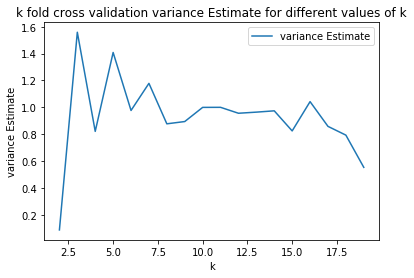

In [247]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.arange(2,20,1),crossValVarOfErrorForEachK, label= 'variance Estimate')
ax.legend(loc=0) # upper left corner
ax.set_xlabel('k')
ax.set_ylabel('variance Estimate')
ax.set_title('k fold cross validation variance Estimate for different values of k');

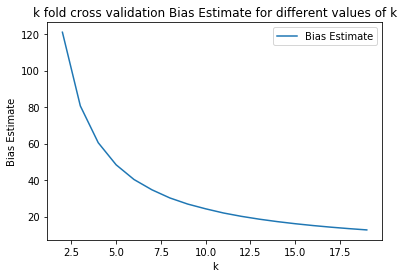

In [245]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.arange(2,20,1),crossValAvgErrorForEachK, label= 'Bias Estimate')
ax.legend(loc=0) # upper left corner
ax.set_xlabel('k')
ax.set_ylabel('Bias Estimate')
ax.set_title('k fold cross validation Bias Estimate for different values of k');

In [198]:
len(ValXmatrix)

1

In [229]:
print(crossValAvgErrorForEachLamda)

[60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001, 60.70835000000001]


In [230]:
print(crossValVarOfErrorForEachLamda)

[0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745, 0.7199280606421745]


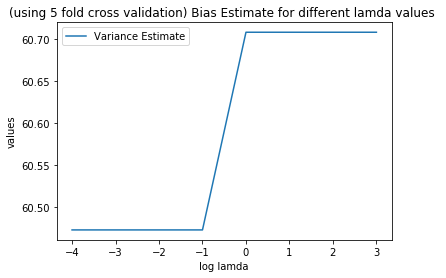

In [235]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#for i in numOfdimPlusOne:#[:-1]
#for i in lamdavalues:
#ax.plot(np.arange(0.8,0.91,0.01),crossValAvgErrorForEachLamda, label= 'Bias Estimate')
ax.plot(np.log([1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),crossValAvgErrorForEachLamda, label= 'Variance Estimate')
ax.legend(loc=0) # upper left corner
ax.set_xlabel('log lamda')
ax.set_ylabel('values')
ax.set_title('(using 5 fold cross validation) Bias Estimate for different lamda values ');

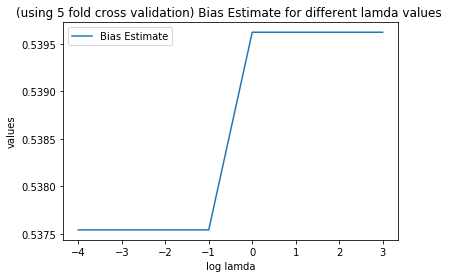

In [212]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#for i in numOfdimPlusOne:#[:-1]
#for i in lamdavalues:
ax.plot(np.log([1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100 ,1000])/np.log(10),crossValAvgErrorForEachLamda, label= 'Bias Estimate')
#ax.plot(np.log([1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),crossValVarOfErrorForEachLamda, label= 'Variance Estimate')
ax.legend(loc=0) # upper left corner
ax.set_xlabel('log lamda')
ax.set_ylabel('values')
ax.set_title('(using 5 fold cross validation) Bias Estimate for different lamda values ');

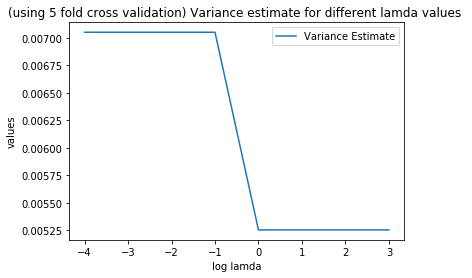

In [213]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#for i in numOfdimPlusOne:#[:-1]
#for i in lamdavalues:
#ax.plot(np.log([1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100 ,1000])/np.log(10),crossValAvgErrorForEachLamda, label= 'Bias Estimate')
ax.plot(np.log([1e-4 ,1e-3, 1e-2, 0.1, 1, 10, 100,1000 ])/np.log(10),crossValVarOfErrorForEachLamda, label= 'Variance Estimate')
ax.legend(loc=0) # upper left corner
ax.set_xlabel('log lamda')
ax.set_ylabel('values')
ax.set_title('(using 5 fold cross validation) Variance estimate for different lamda values ');